In [1]:
import pandas as pd

In [2]:
!pip3 install -U ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

In [4]:
# fetch dataset
dia_130 = fetch_ucirepo(id=296)
# metadata
print("A metadata Description")
print(dia_130.metadata)

print(dia_130.shape)

#variable information
print(dia_130.variables)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


A metadata Description
{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control.

In [5]:
# data (as pandas dataframes)
X_130 = dia_130.data.features
y_130 = dia_130.data.targets

print("DataFrame")
pandas_df = pd.DataFrame(X_130, columns=dia_130.feature_names)
pandas_df.drop(['weight','payer_code','medical_specialty'], axis = 1, inplace = True)
pandas_df = pandas_df.dropna(subset=['race','diag_1', 'diag_2', 'diag_3'])
print(pandas_df.shape)
print("Features and number of NaN values per feature/column")
v1_130 = pandas_df.isnull().sum()
print(v1_130)


DataFrame
(98053, 44)
Features and number of NaN values per feature/column
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                 

In [6]:
print(pandas_df.head())
print(pandas_df.dtypes)

              race  gender      age  admission_type_id  \
1        Caucasian  Female  [10-20)                  1   
2  AfricanAmerican  Female  [20-30)                  1   
3        Caucasian    Male  [30-40)                  1   
4        Caucasian    Male  [40-50)                  1   
5        Caucasian    Male  [50-60)                  2   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   
5                         1                    2                 3   

   num_lab_procedures  num_procedures  num_medications  ...  examide  \
1                  59               0               18  ...       No   
2                  11               5               13  ...       No   
3             

In [7]:
for column in pandas_df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{column}': {pandas_df[column].unique()}")

Unique values in 'race': ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
Unique values in 'gender': ['Female' 'Male' 'Unknown/Invalid']
Unique values in 'age': ['[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)'
 '[80-90)' '[90-100)' '[0-10)']
Unique values in 'diag_1': ['276' '648' '8' '197' '414' '428' '398' '434' '250.7' '157' '518' '999'
 '410' '682' '402' 'V57' '189' '786' '427' '996' '277' '584' '462' '473'
 '411' '174' '486' '998' '511' '432' '626' '295' '196' '250.6' '182' '845'
 '423' '808' '250.4' '722' '403' '784' '707' '440' '151' '715' '997' '198'
 '564' '38' '590' '578' '250.32' '433' '569' '185' '536' '255' '250.13'
 '599' '558' '574' '491' '560' '244' '250.03' '577' '730' '188' '824'
 '250.8' '332' '562' '291' '296' '510' '401' '263' '438' '70' '642' '571'
 '738' '593' '618' '250.42' '807' '456' '446' '572' '575' '250.41'
 '250.02' '820' '515' '780' '250.22' '995' '235' '250.82' '721' '787'
 '556' '162' '724' '282' '250.83' '514' 'V55' '281

Load CSV

Create a Mapping

Map the codes

Encode categorical data


In [8]:
conv2_csv_url = 'https://raw.githubusercontent.com/brotaur/MLdiabetes/main/Converstion%20table2.csv'
conversion_table2 = pd.read_csv(conv2_csv_url, encoding='ISO-8859-1')

# Create the mapping dictionary
diag_code_to_category = dict(zip(conversion_table2['Diag Code'], conversion_table2['Diag Category']))

# Apply the mapping to each diagnosis column in main DataFrame
for col in ['diag_1', 'diag_2', 'diag_3']:
    # Assuming diagnosis columns are of type 'object' (string)
    pandas_df[col + '_category'] = pandas_df[col].map(diag_code_to_category)

# After mapping, the original diagnosis columns may be dropped since they're no longer needed
pandas_df.drop(['diag_1', 'diag_2', 'diag_3'], axis=1, inplace=True)

#one-hot encoding on the categorical diagnosis category columns
pandas_df = pd.get_dummies(pandas_df, columns=['diag_1_category','diag_2_category','diag_3_category'])

#check result
print(pandas_df.head())


              race  gender      age  admission_type_id  \
1        Caucasian  Female  [10-20)                  1   
2  AfricanAmerican  Female  [20-30)                  1   
3        Caucasian    Male  [30-40)                  1   
4        Caucasian    Male  [40-50)                  1   
5        Caucasian    Male  [50-60)                  2   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
1                         1                    7                 3   
2                         1                    7                 2   
3                         1                    7                 2   
4                         1                    7                 1   
5                         1                    2                 3   

   num_lab_procedures  num_procedures  num_medications  ...  \
1                  59               0               18  ...   
2                  11               5               13  ...   
3                  44               1    

In [9]:
for column in pandas_df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{column}': {pandas_df[column].unique()}")


Unique values in 'race': ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
Unique values in 'gender': ['Female' 'Male' 'Unknown/Invalid']
Unique values in 'age': ['[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)'
 '[80-90)' '[90-100)' '[0-10)']
Unique values in 'max_glu_serum': ['None' '>300' 'Norm' '>200']
Unique values in 'A1Cresult': ['None' '>7' '>8' 'Norm']
Unique values in 'metformin': ['No' 'Steady' 'Up' 'Down']
Unique values in 'repaglinide': ['No' 'Up' 'Steady' 'Down']
Unique values in 'nateglinide': ['No' 'Steady' 'Down' 'Up']
Unique values in 'chlorpropamide': ['No' 'Steady' 'Down' 'Up']
Unique values in 'glimepiride': ['No' 'Steady' 'Down' 'Up']
Unique values in 'acetohexamide': ['No' 'Steady']
Unique values in 'glipizide': ['No' 'Steady' 'Up' 'Down']
Unique values in 'glyburide': ['No' 'Steady' 'Up' 'Down']
Unique values in 'tolbutamide': ['No' 'Steady']
Unique values in 'pioglitazone': ['No' 'Steady' 'Up' 'Down']
Unique values in 'rosiglitazon

Below is unused code that I expiremented with

In [9]:
# Create the mapping dictionary
#diag_code_to_category = dict(zip(conversion_table2['Diag Code'], conversion_table['Diag Category']))

# Apply the mapping to each diagnosis column in your main DataFrame
#for col in ['diag_1', 'diag_2', 'diag_3']:
    # Assuming your diagnosis columns are of type 'object' (string)
    #pandas_df[col + '_category'] = pandas_df[col].map(diag_code_to_category)

# After mapping, the original diagnosis columns may be dropped if they're no longer needed
#pandas_df.drop(['diag_1', 'diag_2', 'diag_3'], axis=1, inplace=True)

# Now your DataFrame has the categorized diagnosis data and is ready for further machine learning preprocessing.
# If you need to encode these categorical variables, you can use one-hot encoding or label encoding as follows:

# For label encoding
#label_encoder = LabelEncoder()
#for col in ['diag_1_category', 'diag_2_category', 'diag_3_category']:
   #pandas_df[col] = label_encoder.fit_transform(pandas_df[col].astype(str))


IndentationError: unexpected indent (<ipython-input-9-a116d300196c>, line 18)

More unused code Encoding objects, this one had less columns.. not sure how it worked:

In [13]:
#conversion of diag codes
#conv2_csv_url = 'https://raw.githubusercontent.com/brotaur/MLdiabetes/main/Converstion%20table2.csv'

#load conversion table
#conversion_table = pd.read_csv(conv2_csv_url, encoding = 'ISO-8859-1')

#merge data
#ensure that diag_code in conversion_table is of type str to match diag_x columns
#conversion_table['Diag Code'] = conversion_table['Diag Code'].astype(str)

#Loop through each diagnosis column and merge with the conversion table
#for diag_col in ['diag_1', 'diag_2','diag_3']:
  #Ensure the diag_col in pandas_df is string type for matching
  #pandas_df[diag_col] = pandas_df[diag_col].astype(str)

  #Merge with the conversion table to get corresponding categories
  #merged_df = pandas_df.merge(conversion_table, left_on = diag_col,right_on='Diag Code', how='left', suffixes=('', f'_{diag_col}'))

  #after merge, there are new columns for categories associated with diag_1, diag_2, diag_3
  #merged_df.rename(columns = {'Diag Category':f'Diag Category_{diag_col}'}, inplace = True)

  #Update pandas_df with new columns from merged_df
  #pandas_df = merged_df

#check result
#print(pandas_df.head())



              race  gender      age  admission_type_id  \
0        Caucasian  Female  [10-20)                  1   
1  AfricanAmerican  Female  [20-30)                  1   
2        Caucasian    Male  [30-40)                  1   
3        Caucasian    Male  [40-50)                  1   
4        Caucasian    Male  [50-60)                  2   

   discharge_disposition_id  admission_source_id  time_in_hospital  \
0                         1                    7                 3   
1                         1                    7                 2   
2                         1                    7                 2   
3                         1                    7                 1   
4                         1                    2                 3   

   num_lab_procedures  num_procedures  num_medications  ...  Diag Code_diag_2  \
0                  59               0               18  ...            250.01   
1                  11               5               13  ...         

In [13]:
from sklearn.preprocessing import LabelEncoder

#categories without a natural order
label_encoder = LabelEncoder()


nominal_features = ['race', 'gender', 'age','metformin','repaglinide',
'nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide',
'glyburide',
'tolbutamide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'troglitazone',
'tolazamide',
'examide',
'citoglipton',
'insulin',
'glyburide-metformin',
'glipizide-metformin',
'glimepiride-pioglitazone',
'metformin-rosiglitazone',
'metformin-pioglitazone',
'change','diabetesMed']
pandas_df = pd.get_dummies(pandas_df, columns = nominal_features)


from sklearn.preprocessing import OrdinalEncoder

# Mapping for ordinal encoder
max_glu_serum_mapping = {'None': 0, 'Norm': 1, '>200': 2, '>300': 3}
A1Cresult_mapping = {'None': 0, 'Norm': 1, '>7': 2, '>8': 3}

# Applying mapping
pandas_df['max_glu_serum'] = pandas_df['max_glu_serum'].map(max_glu_serum_mapping)
pandas_df['A1Cresult'] = pandas_df['A1Cresult'].map(A1Cresult_mapping)

In [15]:
pandas_df.dtypes

admission_type_id                int64
discharge_disposition_id         int64
admission_source_id              int64
time_in_hospital                 int64
num_lab_procedures               int64
                                 ...  
metformin-pioglitazone_Steady    uint8
change_Ch                        uint8
change_No                        uint8
diabetesMed_No                   uint8
diabetesMed_Yes                  uint8
Length: 514, dtype: object

In [16]:
# Load the CSV data into a DataFrame
# Assuming 'drugclass_rotation.csv' is your CSV file with medication class mappings
class_df = 'https://raw.githubusercontent.com/brotaur/MLdiabetes/main/drugclass_rotation.csv'
drugclass = pd.read_csv(class_df, encoding='ISO-8859-1')


# Transform the DataFrame from wide to long format
melted_class_df = class_df.melt(id_vars=['Medication'], var_name='DrugClass', value_name='IsInClass')

# Filter out rows where the medication does not belong to the drug class
melted_class_df = melted_class_df[melted_class_df['IsInClass'] == 1]

# Drop the 'IsInClass' column as it's no longer needed
melted_class_df.drop('IsInClass', axis=1, inplace=True)

# Assume pandas_df already has medication columns like 'metformin', 'repaglinide', etc.
# For simplicity, let's consider these columns are already binary (0s and 1s) indicating the presence of the medication

# Now map the classes to each medication in your main DataFrame
for index, row in melted_class_df.iterrows():
    medication = row['Medication'].lower().replace("-", "_")  # Make the name compatible with column naming conventions
    drug_class = row['DrugClass']

    # Check if the medication column exists in your DataFrame, if not, create and initialize to 0
    if medication not in pandas_df.columns:
        pandas_df[medication] = 0

    # If the medication is present (value 1), update the respective drug class columns
    pandas_df.loc[pandas_df[medication] == 1, drug_class] = 1

# Ensure all other drug class columns are present; if not, add them initialized with zeros
for drug_class in melted_class_df['DrugClass'].unique():
    if drug_class not in pandas_df.columns:
        pandas_df[drug_class] = 0

# Your pandas_df now contains binary columns for drug classes as well
print(pandas_df.head())


AttributeError: 'str' object has no attribute 'melt'

In [11]:
from sklearn.preprocessing import LabelEncoder

#categories without a natural order
label_encoder = LabelEncoder()


nominal_features = ['race', 'gender', 'age','metformin','repaglinide',
'nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide',
'glyburide',
'tolbutamide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'troglitazone',
'tolazamide',
'examide',
'citoglipton',
'insulin',
'glyburide-metformin',
'glipizide-metformin',
'glimepiride-pioglitazone',
'metformin-rosiglitazone',
'metformin-pioglitazone',
'change','diabetesMed']
pandas_df = pd.get_dummies(pandas_df, columns = nominal_features)

for feature in features_to_label_encode:
    pandas_df[feature] = label_encoder.fit_transform(pandas_df[feature])

##from sklearn.preprocessing import OrdinalEncoder

# Mapping for ordinal encoder
max_glu_serum_mapping = {'None': 0, 'Norm': 1, '>200': 2, '>300': 3}
A1Cresult_mapping = {'None': 0, 'Norm': 1, '>7': 2, '>8': 3}
metformin_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
repaglinide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
nateglinide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
chlorpropamide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
glimepiride_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
acetohexamide_mapping = {'No':0, 'Steady': 1}
glipizide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
glyburide_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
tolbutamide_mapping = {'No':0, 'Steady': 1}
pioglitazone_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
rosiglitazone_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
acarbose_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
miglitol_mapping = {'No':0, 'Steady': 1, 'Up':2, 'Down':3}
troglitazone_mapping = {'No':0, 'Steady': 1}
tolazamide_mapping = {'No':0, 'Steady': 1, 'Up':2}
examide_mapping = {'No':0}
citoglipton_mapping = {"No": 0}
insulin_mapping = {"No": 0, "Steady": 1, "Up": 2, "Down": 3}
glyburide_metformin_mapping = {"No": 0, "Steady": 1, "Up": 2, "Down": 3}
glipizide_metformin_mapping = {"No": 0, "Steady": 1}
glimepiride_pioglitazone_mapping = {"No": 0, "Steady": 1}
metformin_rosiglitazone_mapping = {'No':0, 'Steady': 1}
metformin_pioglitazone_mapping = {'No':0, 'Steady': 1}
change_mapping = {'No':0, 'Ch':1}
diabetesMed_mapping = {'No':0, 'Yes':1}

# Applying mapping
pandas_df['max_glu_serum'] = pandas_df['max_glu_serum'].map(max_glu_serum_mapping)
pandas_df['A1Cresult'] = pandas_df['A1Cresult'].map(A1Cresult_mapping)
pandas_df['metformin'] = pandas_df['metformin'].map(metformin_mapping)
pandas_df['repaglinide'] = pandas_df['repaglinide'].map(repaglinide_mapping)
pandas_df['nateglinide'] = pandas_df['nateglinide'].map(nateglinide_mapping)
pandas_df['chlorpropamide'] = pandas_df['chlorpropamide'].map(chlorpropamide_mapping)
pandas_df['glimepiride'] = pandas_df['glimepiride'].map(glimepiride_mapping)
pandas_df['acetohexamide'] = pandas_df['acetohexamide'].map(acetohexamide_mapping)
pandas_df['glipizide'] = pandas_df['glipizide'].map(glipizide_mapping)
pandas_df['glyburide'] = pandas_df['glyburide'].map(glyburide_mapping)
pandas_df['tolbutamide'] = pandas_df['tolbutamide'].map(tolbutamide_mapping)
pandas_df['pioglitazone'] = pandas_df['pioglitazone'].map(pioglitazone_mapping)
pandas_df['rosiglitazone'] = pandas_df['rosiglitazone'].map(rosiglitazone_mapping)
pandas_df['acarbose'] = pandas_df['acarbose'].map(acarbose_mapping)
pandas_df['miglitol'] = pandas_df['miglitol'].map(miglitol_mapping)
pandas_df['troglitazone'] = pandas_df['troglitazone'].map(troglitazone_mapping)
pandas_df['tolazamide'] = pandas_df['tolazamide'].map(tolazamide_mapping)
pandas_df['examide'] = pandas_df['examide'].map(examide_mapping)
pandas_df['citoglipton'] = pandas_df['citoglipton'].map(citoglipton_mapping)
pandas_df['insulin'] = pandas_df['insulin'].map(insulin_mapping)
pandas_df['glyburide-metformin'] = pandas_df['glyburide-metformin'].map(glyburide_metformin_mapping)
pandas_df['glipizide-metformin'] = pandas_df['glipizide-metformin'].map(glipizide_metformin_mapping)
pandas_df['glimepiride-pioglitazone'] = pandas_df['glimepiride-pioglitazone'].map(glimepiride_pioglitazone_mapping)
pandas_df['metformin-rosiglitazone'] = pandas_df['metformin-rosiglitazone'].map(metformin_rosiglitazone_mapping)
pandas_df['metformin-pioglitazone'] = pandas_df['metformin-pioglitazone'].map(metformin_pioglitazone_mapping)
pandas_df['change'] = pandas_df['change'].map(change_mapping)
pandas_df['diabetesMed'] = pandas_df['diabetesMed'].map(diabetesMed_mapping)

NameError: name 'LabelEncoder' is not defined

In [ ]:
pandas_df.dtypes

gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
acetohexamide               int64
glipizide                   int64
glyburide                   int64
tolbutamide                 int64
pioglitazone                int64
rosiglitazone               int64
acarbose                    int64
miglitol                    int64
troglitazone                int64
tolazamide    

In [ ]:
 pandas_df.isnull().sum()

gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-

Lets look at features to see if scaling is needed

In [ ]:
pandas_df.describe()

gender            age  admission_type_id  \
count  101766.000000  101766.000000      101766.000000   
mean        0.462443       6.096702           2.024006   
std         0.498649       1.594084           1.445403   
min         0.000000       0.000000           1.000000   
25%         0.000000       5.000000           1.000000   
50%         0.000000       6.000000           1.000000   
75%         1.000000       7.000000           3.000000   
max         2.000000       9.000000           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       ...   examide  citoglipton        insulin  glyburide-metformin  \
count  ...  101766.0     101766.0  101766.000000        101766.000000   
mean   ...       0.0          0.0       0.885708             0.007134   
std    ...       0.0          0.0       1.021758             0.087145   
min    ...       0.0          0.0       0.000000             0.000000   
25%    ...       0.0          0.0       0.000000             0.000000   
50%    ...       0.0          0.0       1.000000             0.000000   
75%    ...       0.0          0.0       1.000000             0.000000   
max    ...       0.0          0.0       3.000000             3.000000   

       glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
count        101766.000000             101766.000000            101766.000000   
mean              0.000128                  0.000010                 0.000020   
std               0.011302                  0.003135                 0.004433   
min               0.000000                  0.000000                 0.000000   
25%               0.000000                  0.000000                 0.000000   
50%               0.000000                  0.000000                 0.000000   
75%               0.000000                  0.000000                 0.000000   
max               1.000000                  1.000000                 1.000000   

       metformin-pioglitazone         change    diabetesMed  
count           101766.000000  101766.000000  101766.000000  
mean                 0.000010       0.461952       0.770031  
std                  0.003135       0.498553       0.420815  
min                  0.000000       0.000000       0.000000  
25%                  0.000000       0.000000       1.000000  
50%                  0.000000       0.000000       1.000000  
75%                  0.000000       1.000000       1.000000  
max                  1.000000       1.000000       1.000000  

[8 rows x 40 columns]

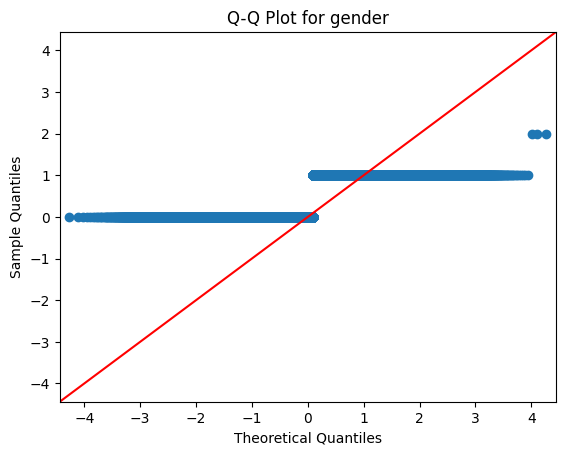

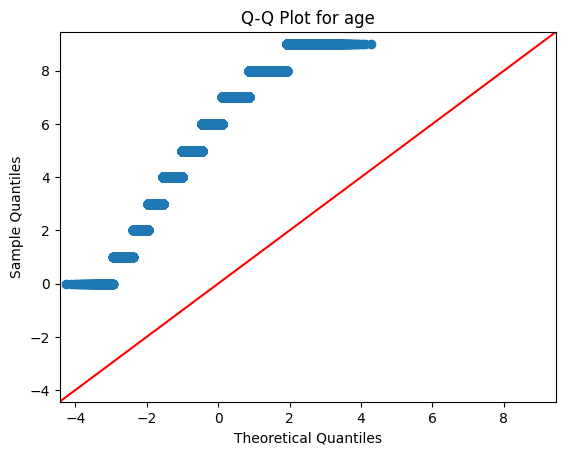

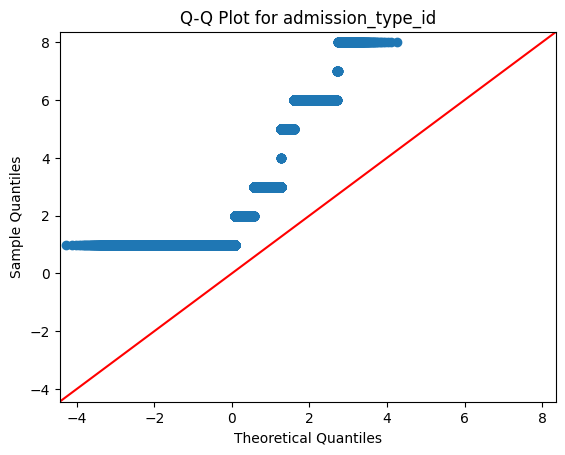

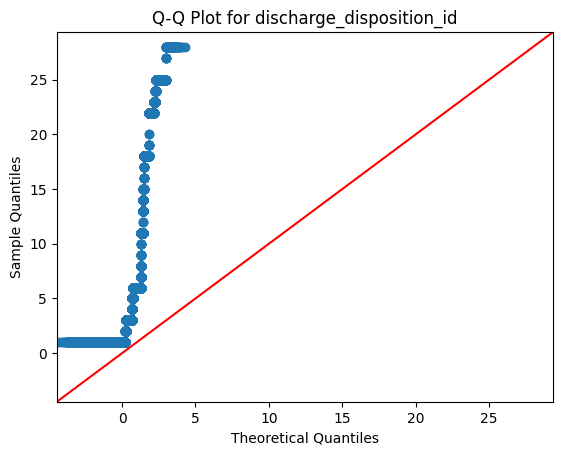

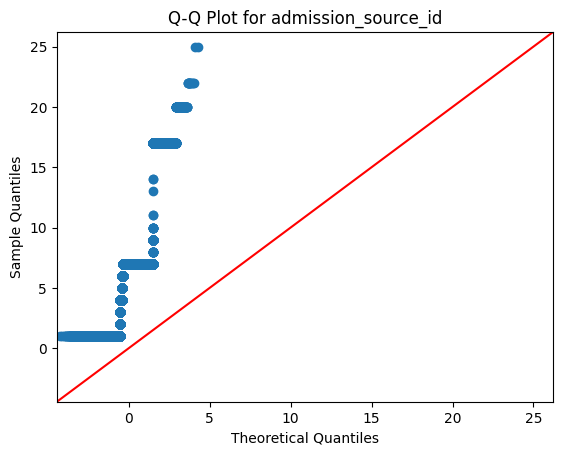

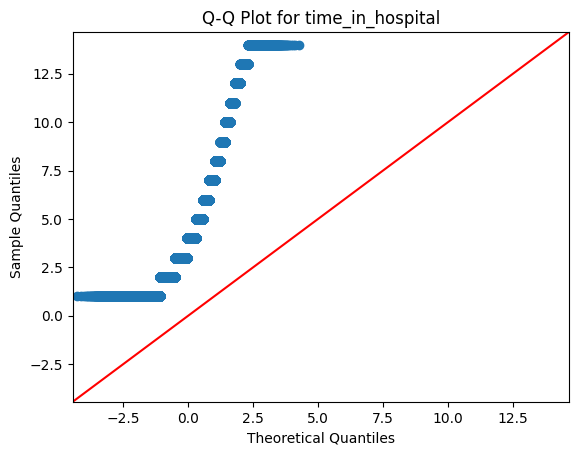

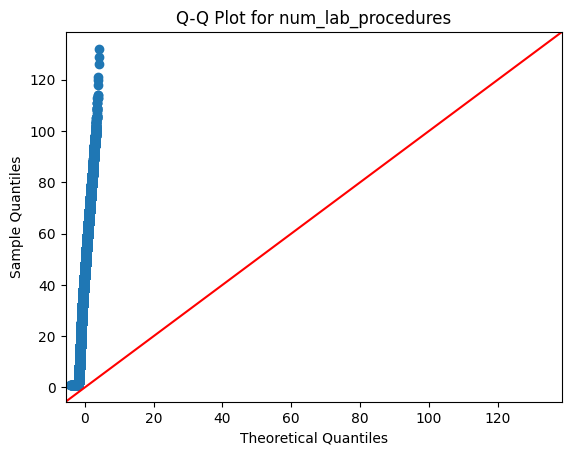

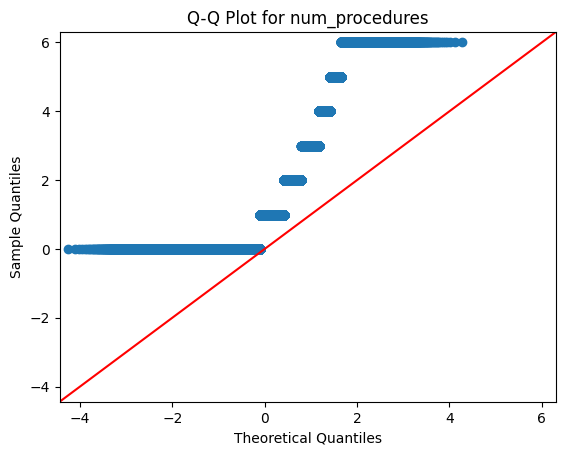

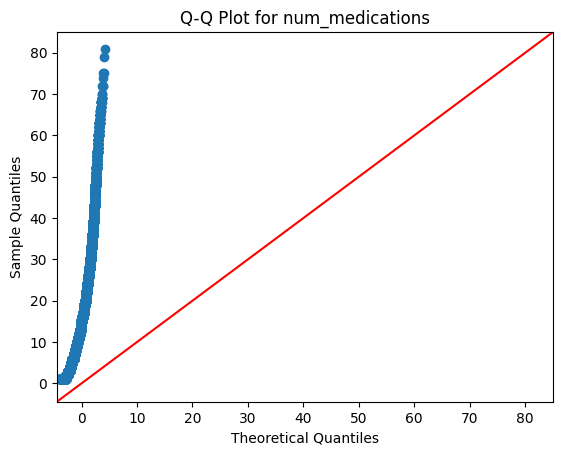

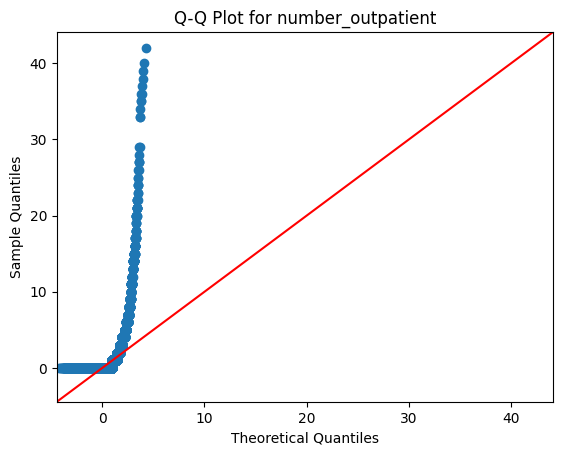

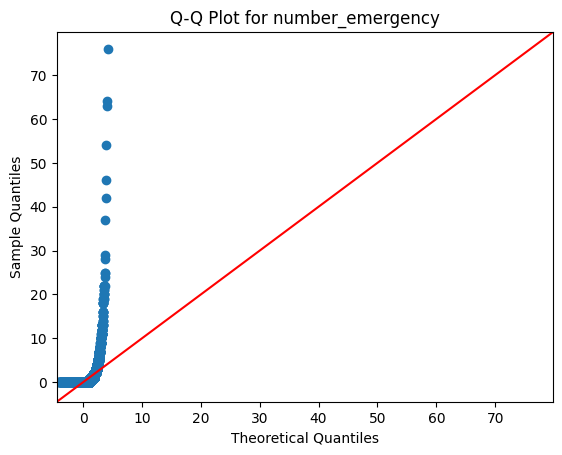

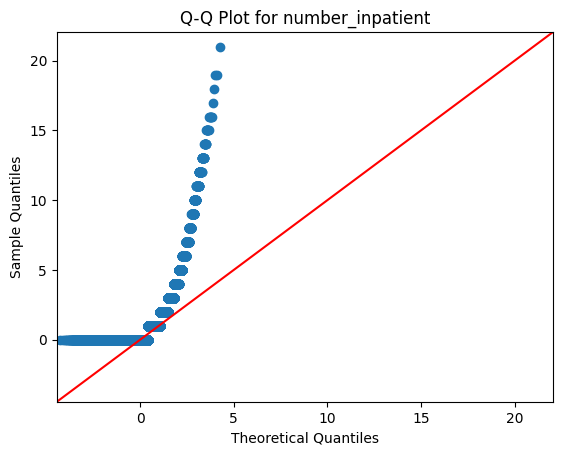

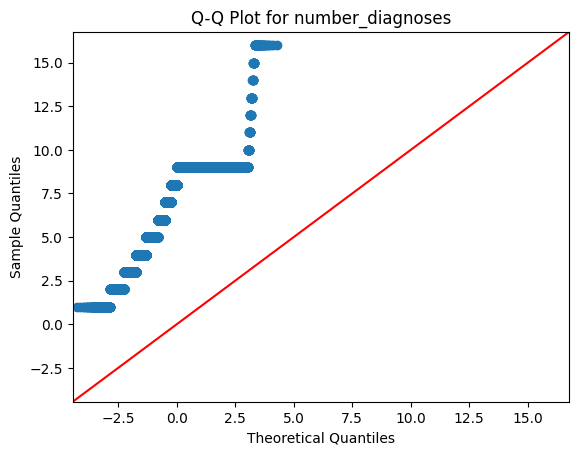

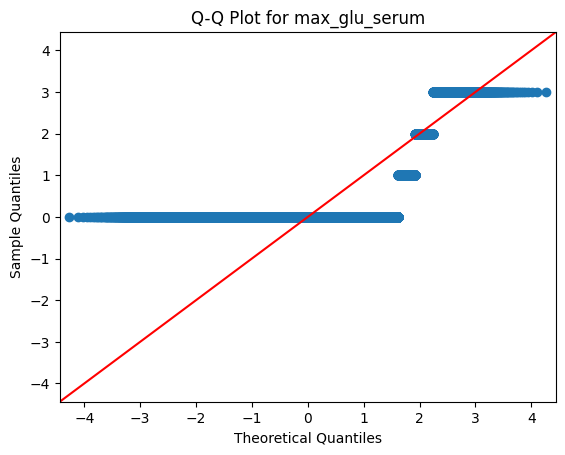

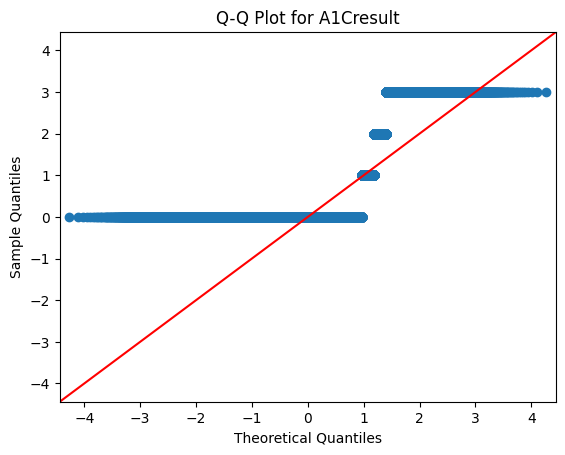

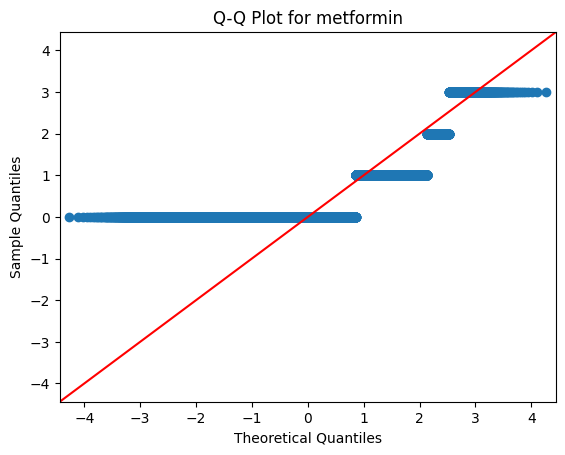

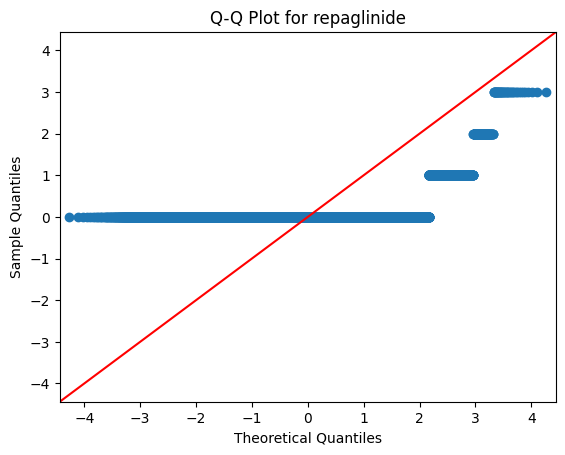

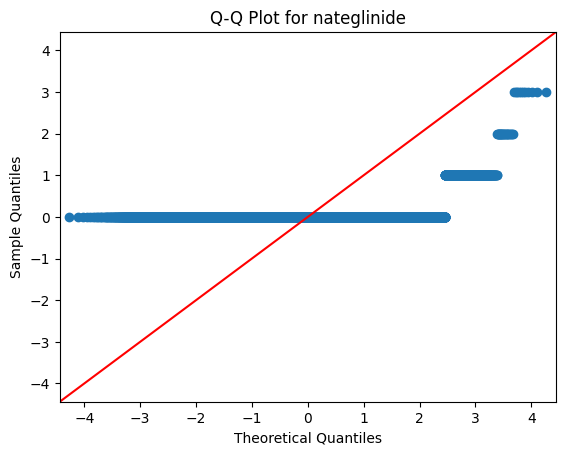

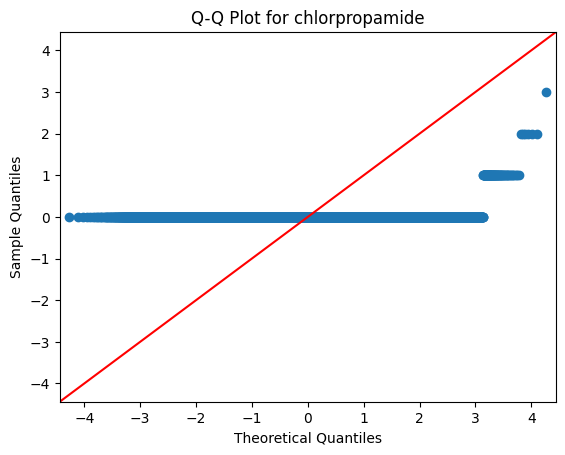

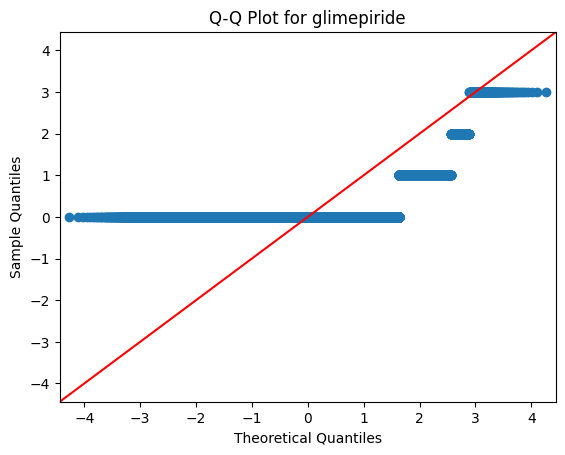

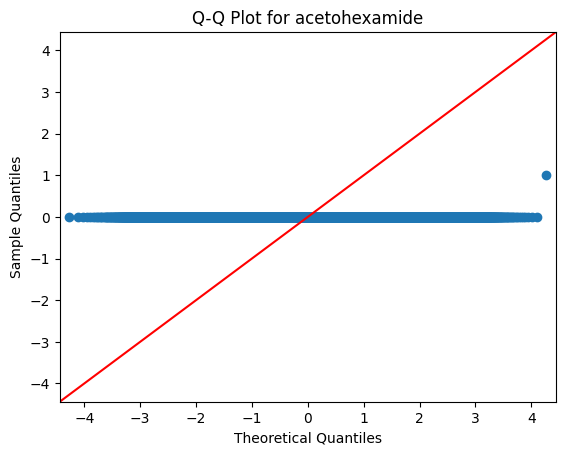

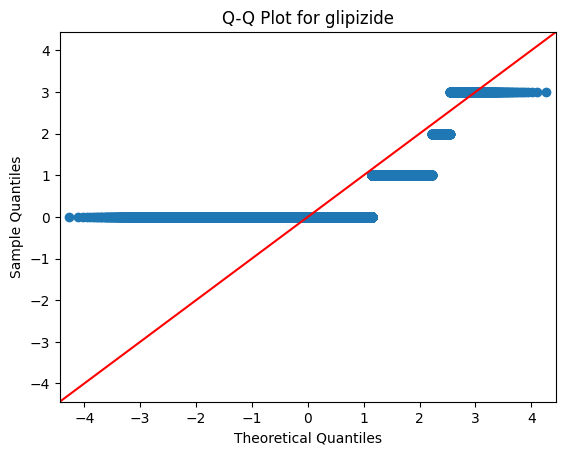

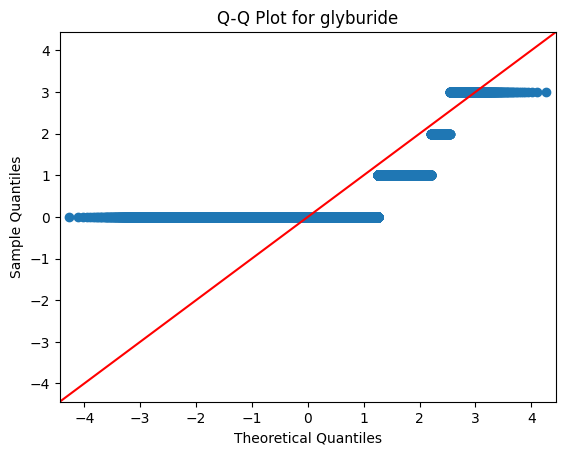

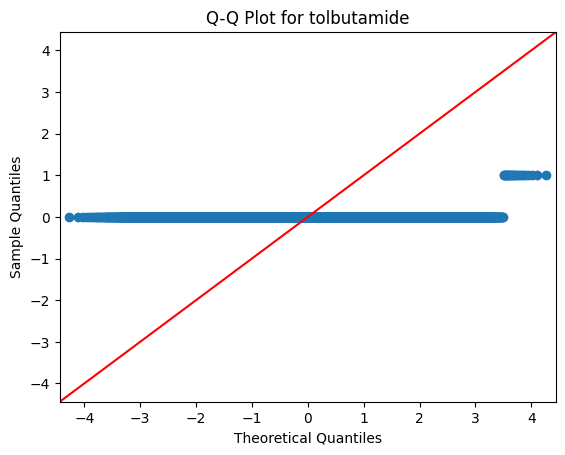

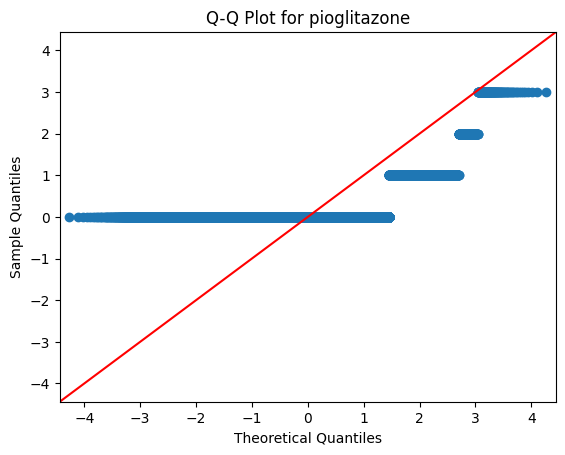

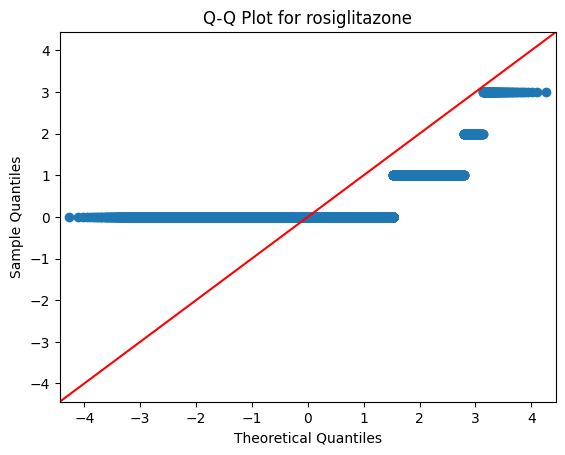

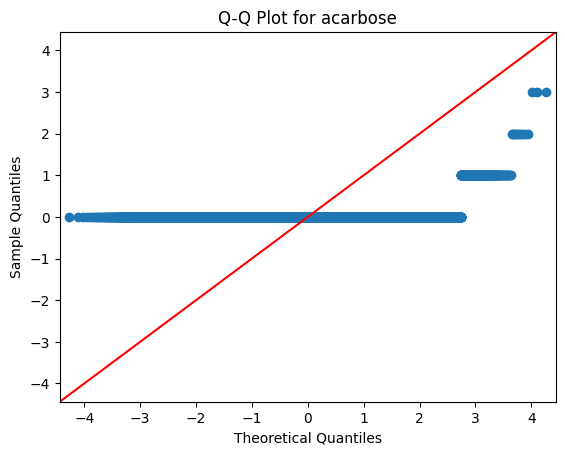

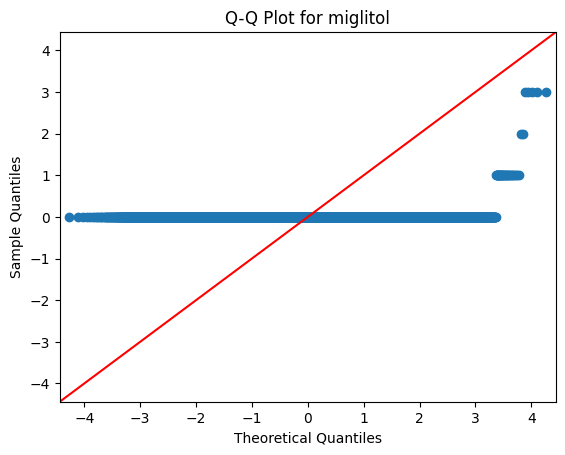

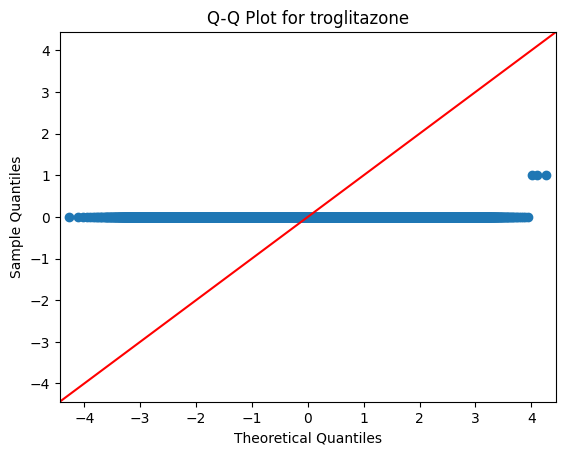

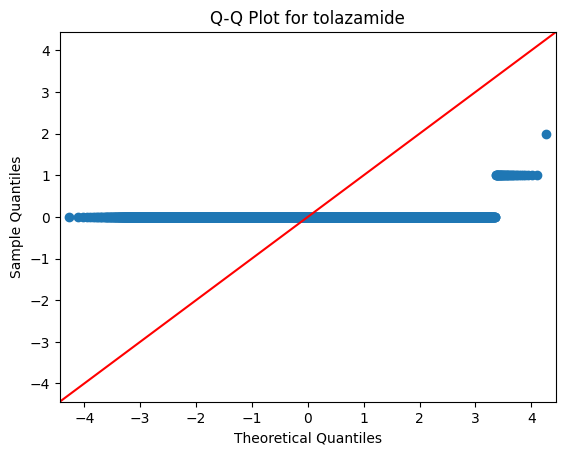

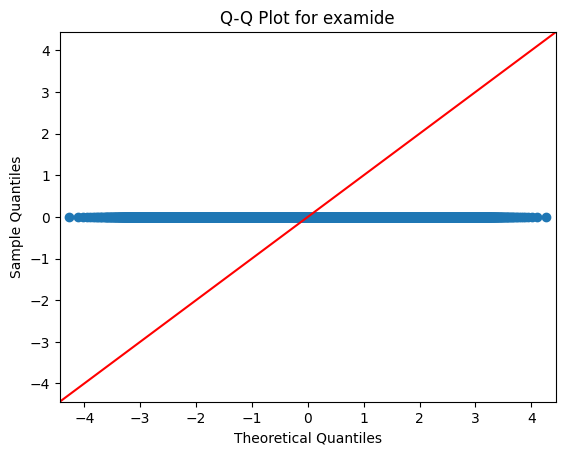

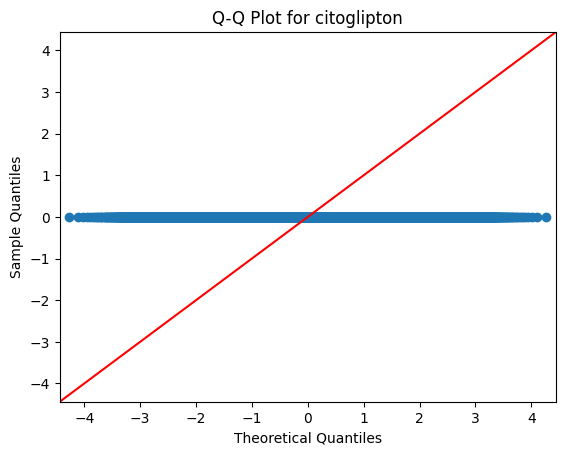

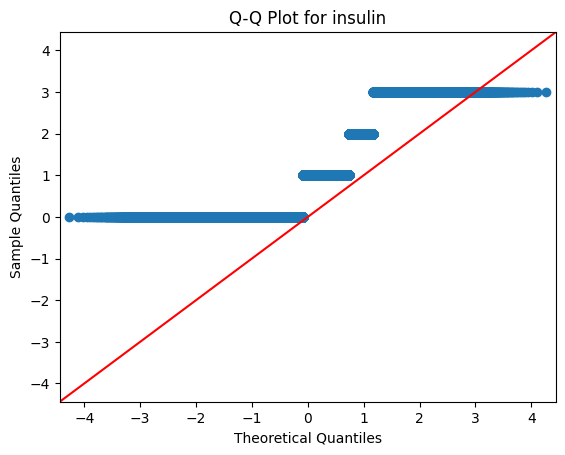

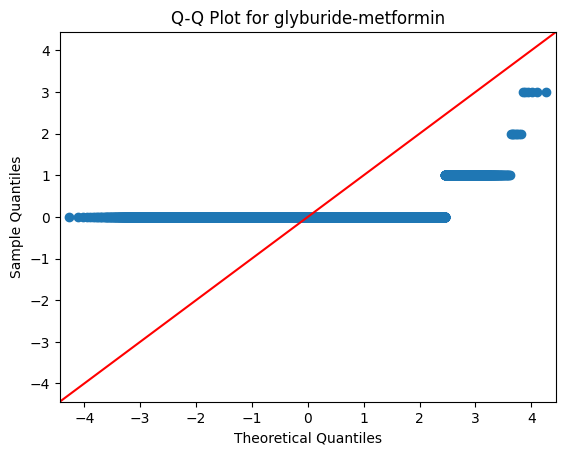

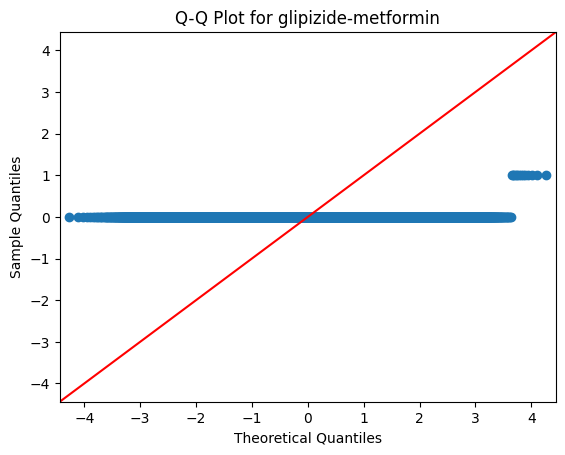

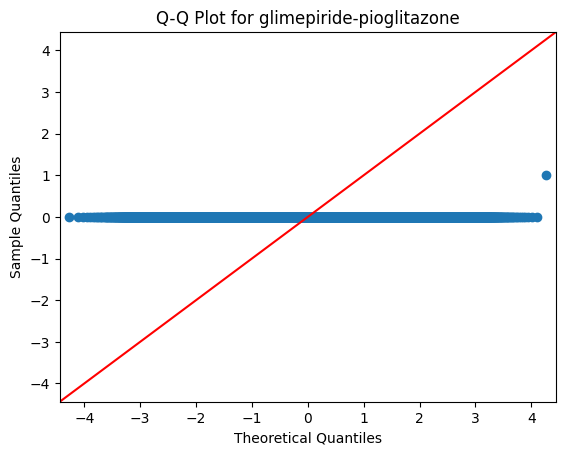

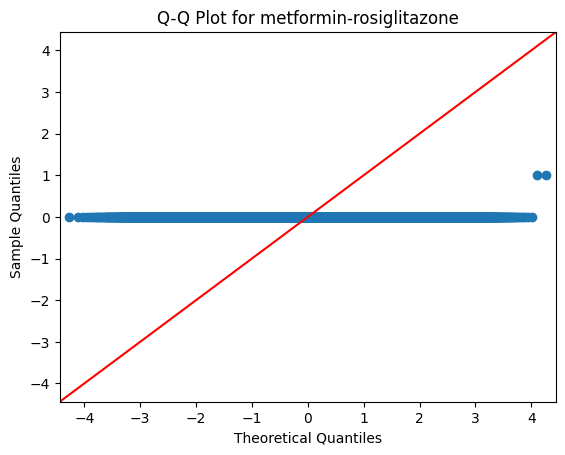

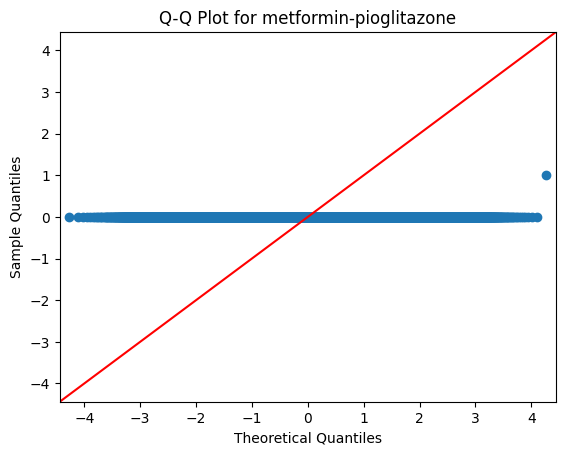

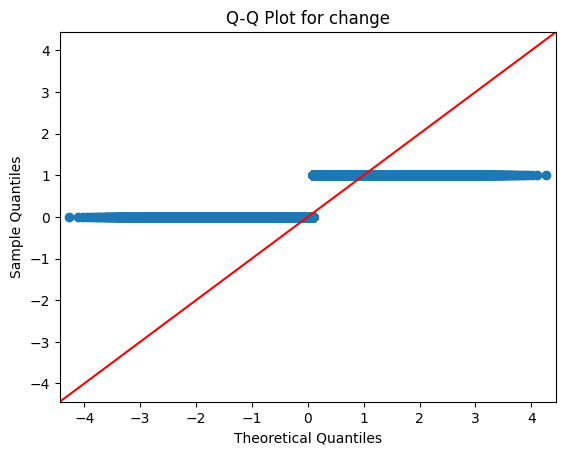

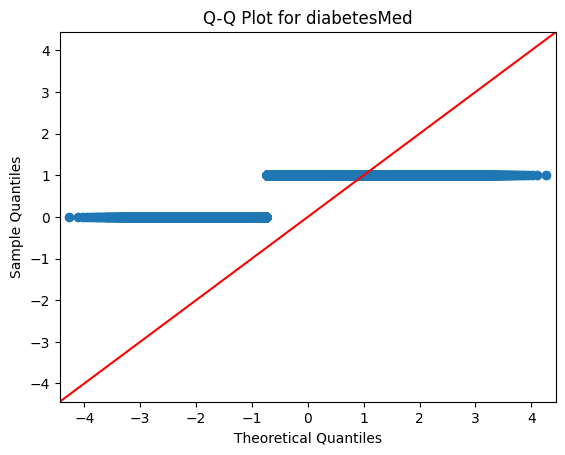

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

for column in pandas_df.select_dtypes(include=['float64', 'int64']).columns:
    sm.qqplot(pandas_df[column], line='45')
    plt.title(f'Q-Q Plot for {column}')
    plt.show()


In [ ]:
import seaborn as sns
import numpy as np

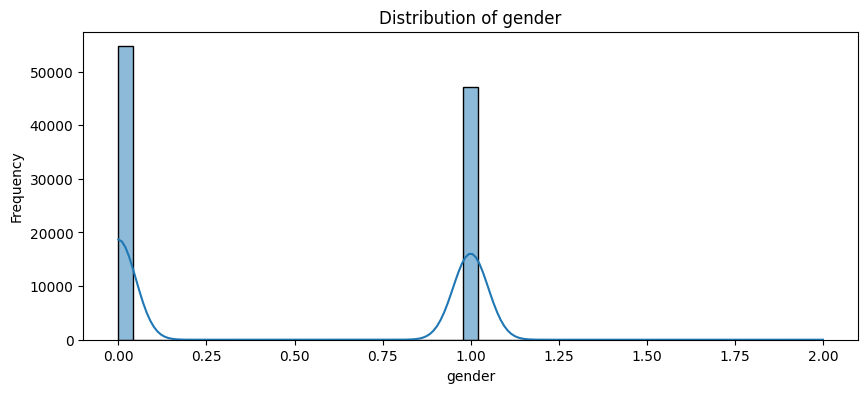

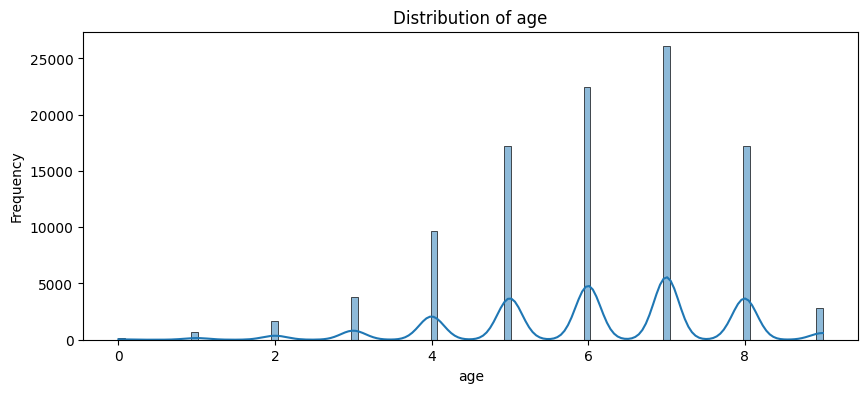

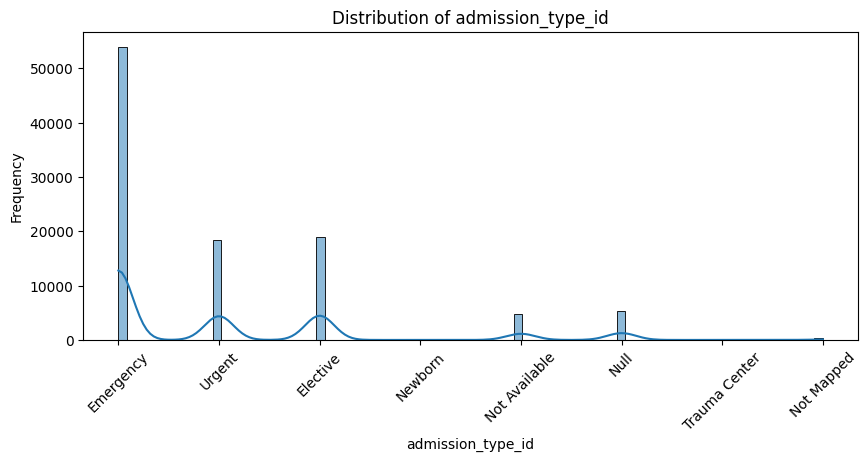

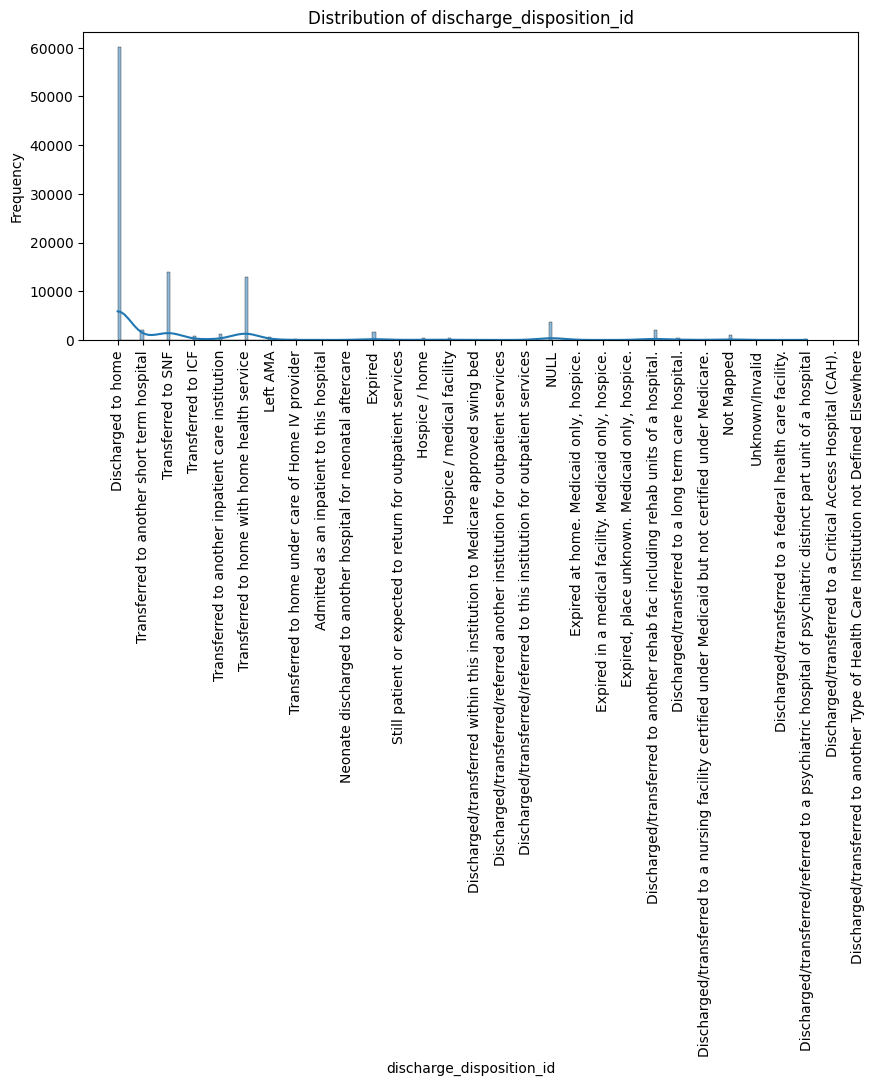

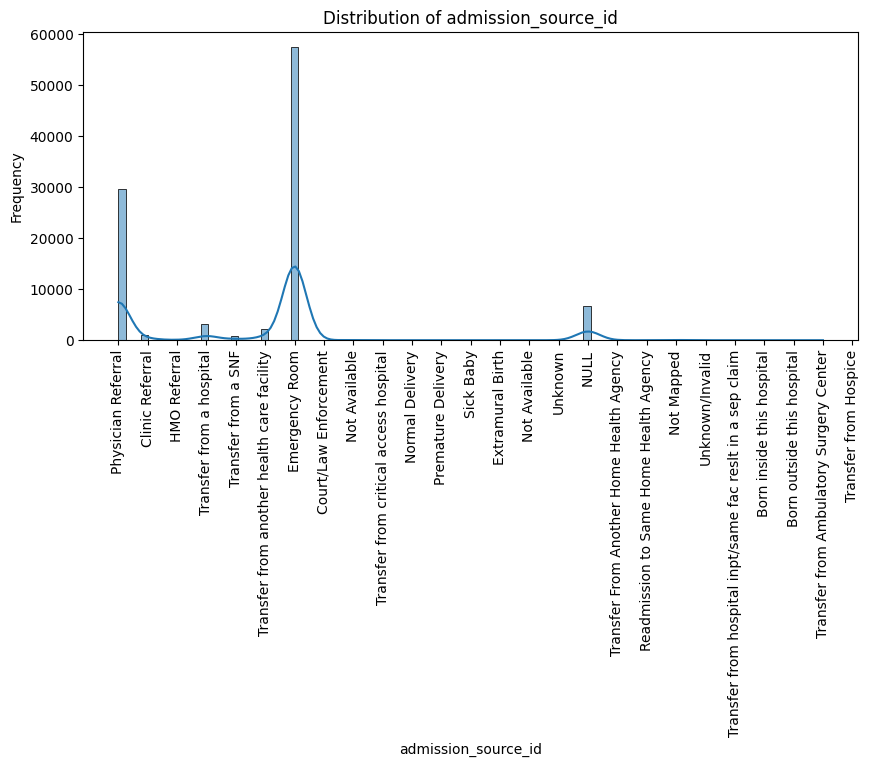

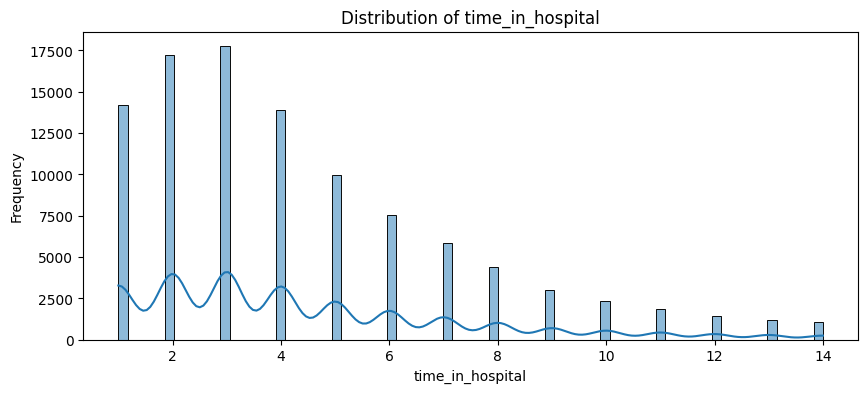

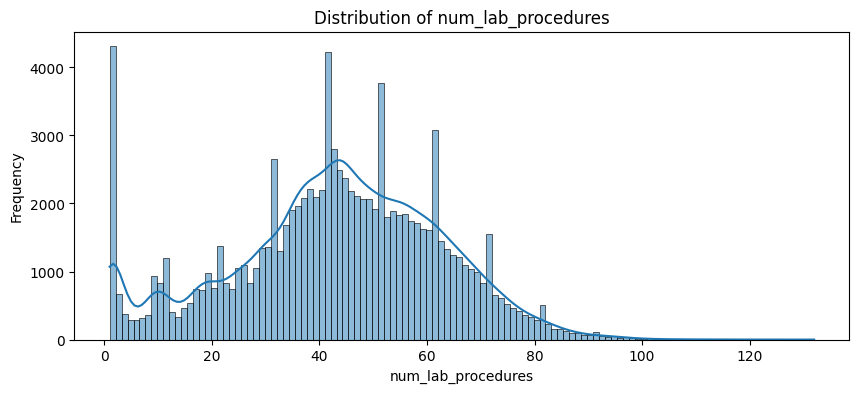

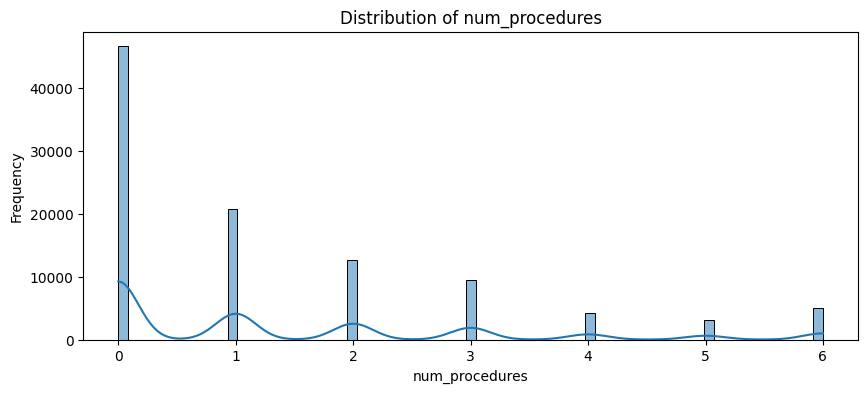

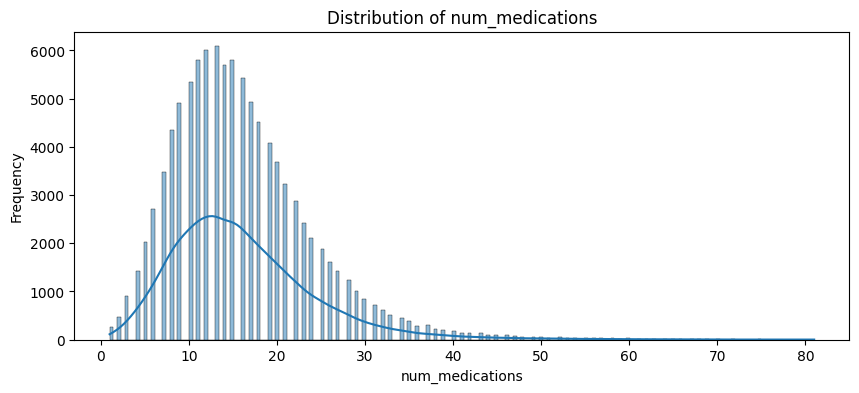

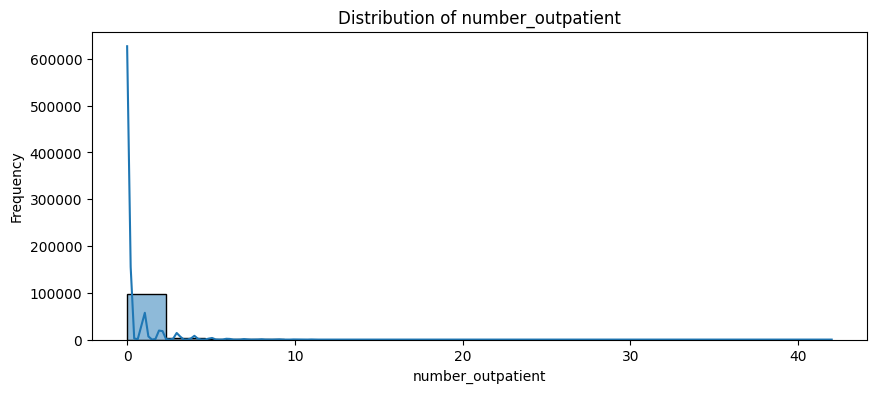

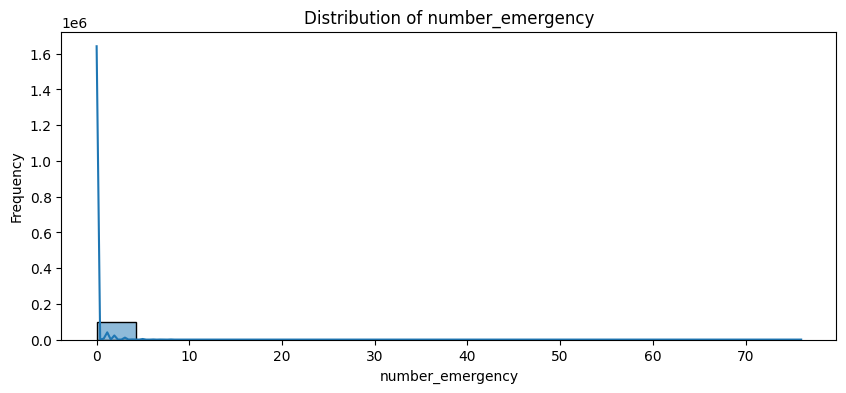

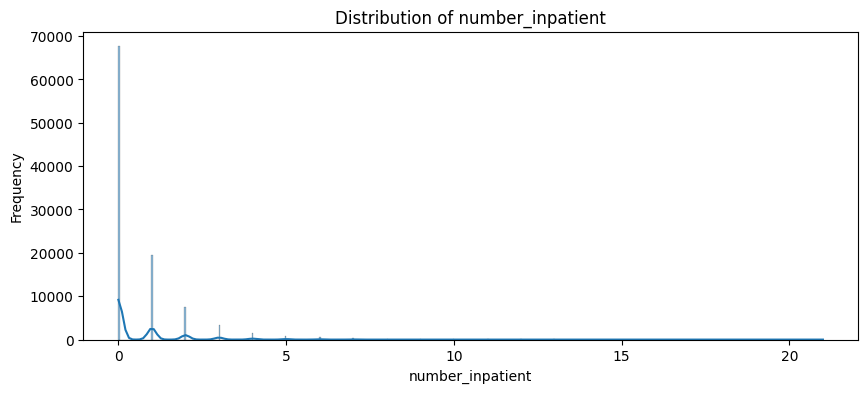

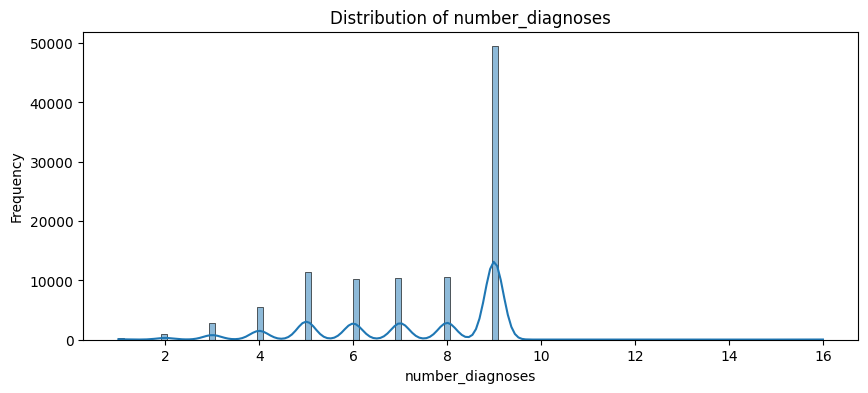

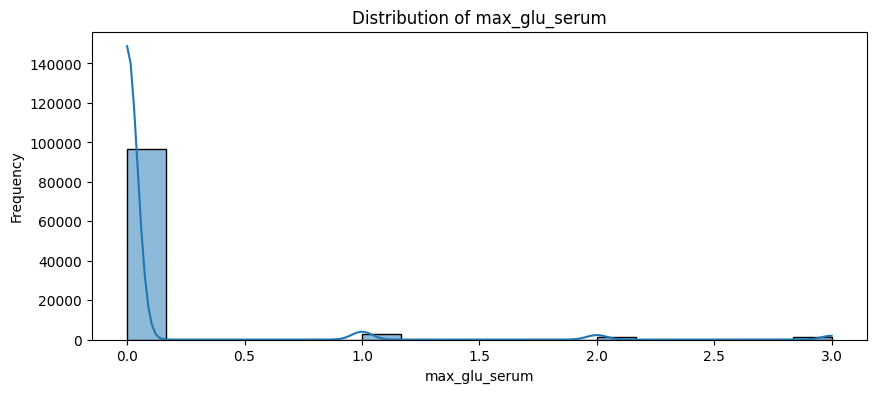

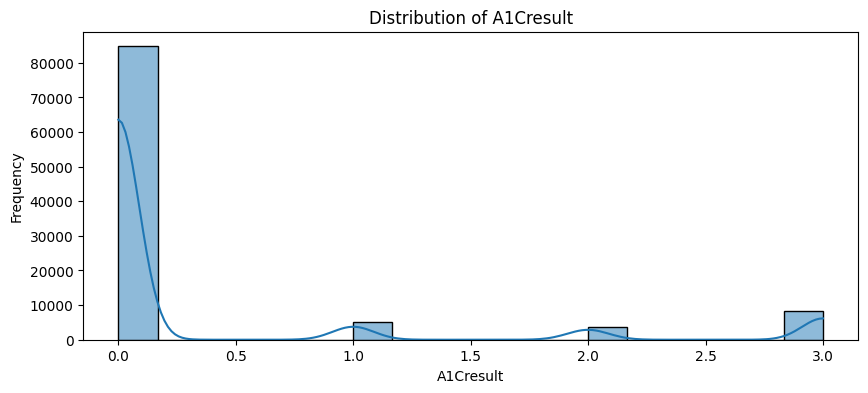

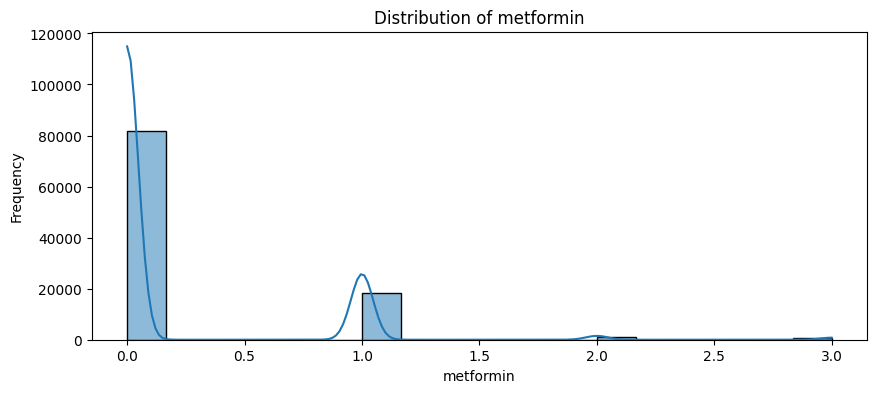

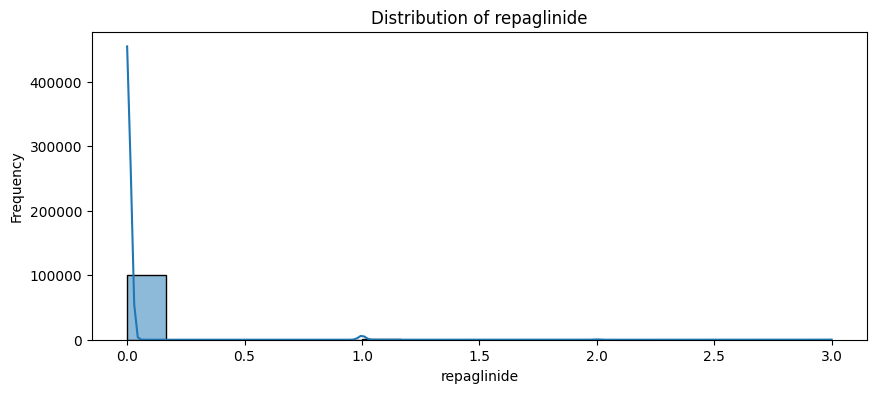

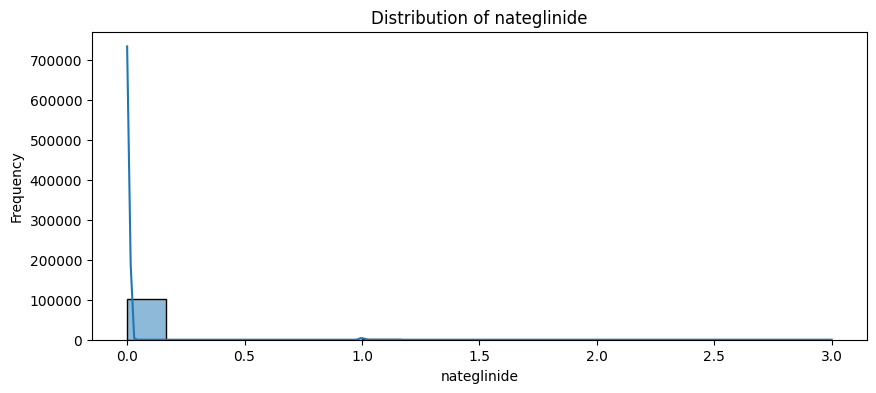

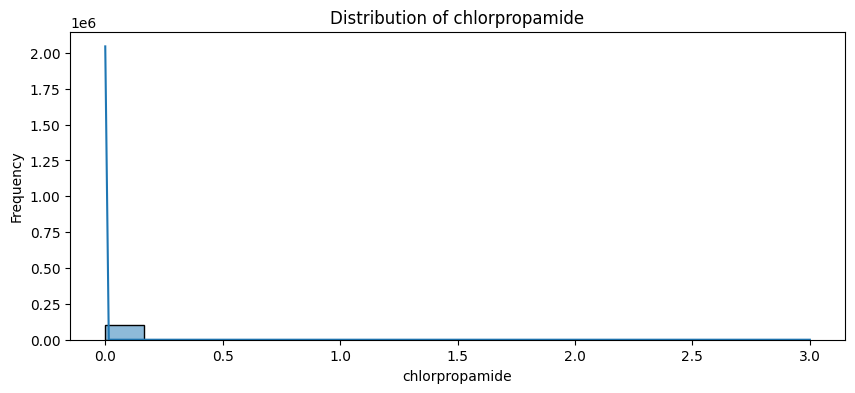

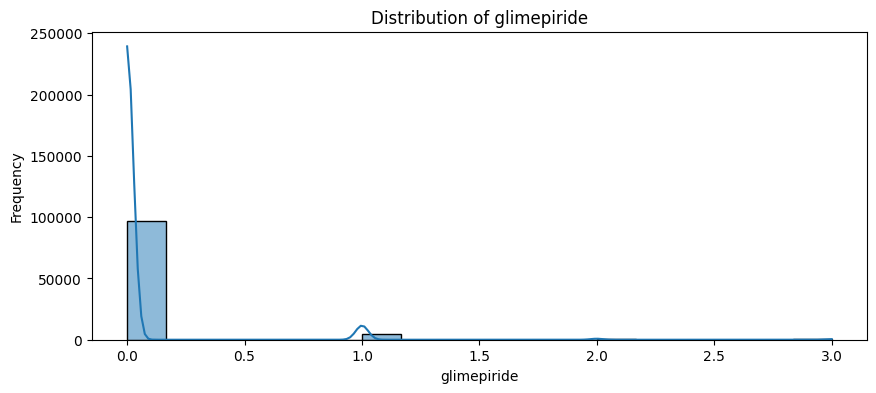

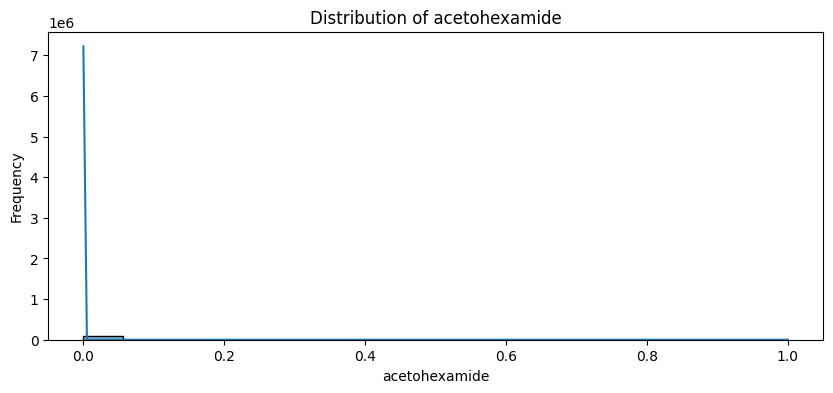

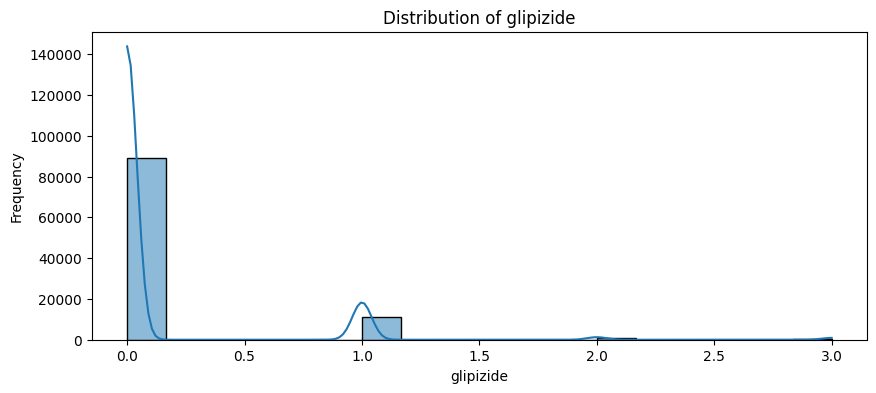

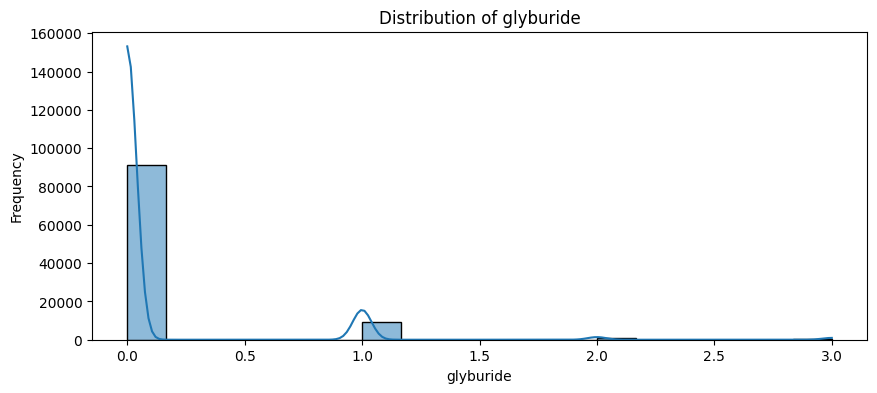

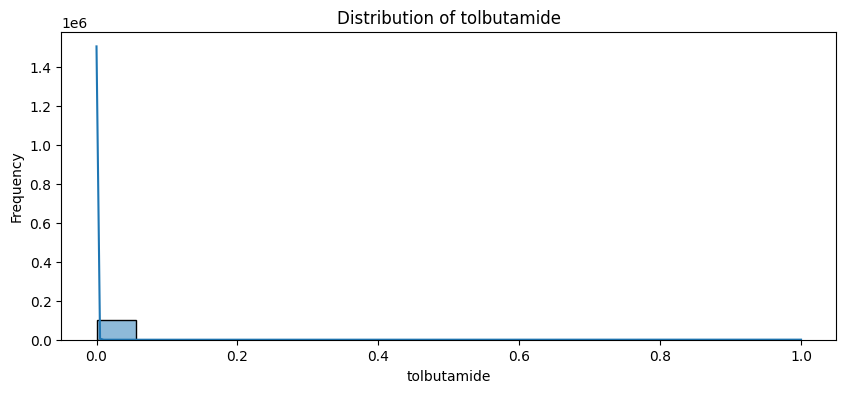

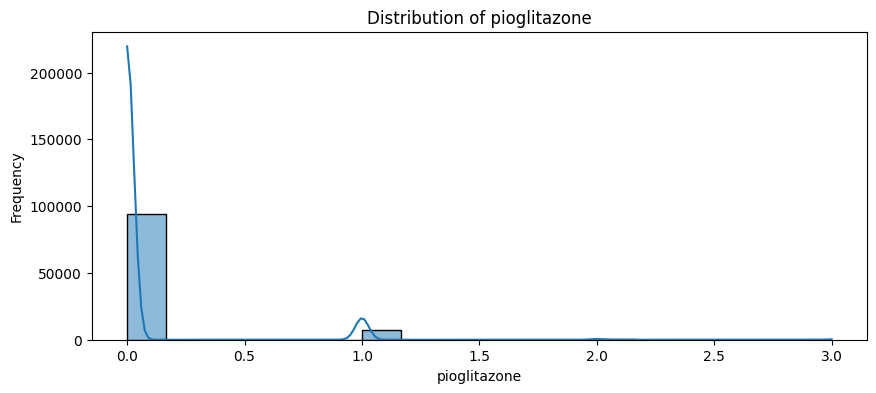

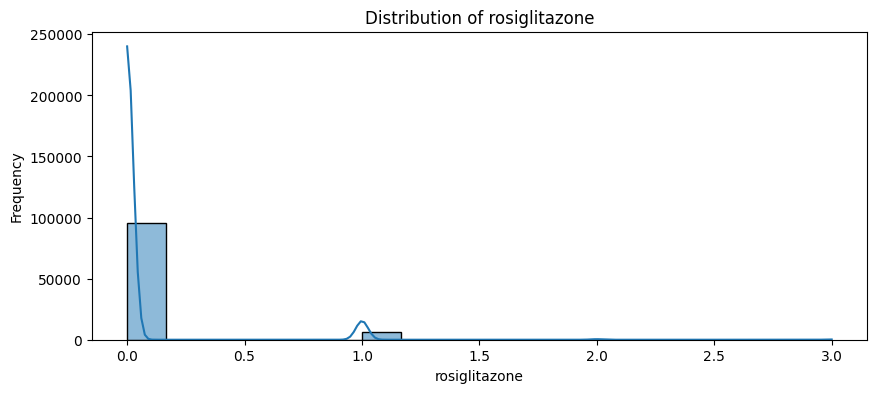

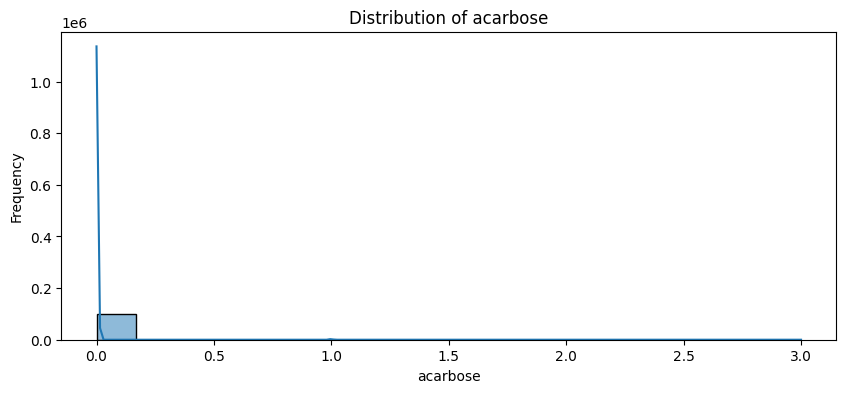

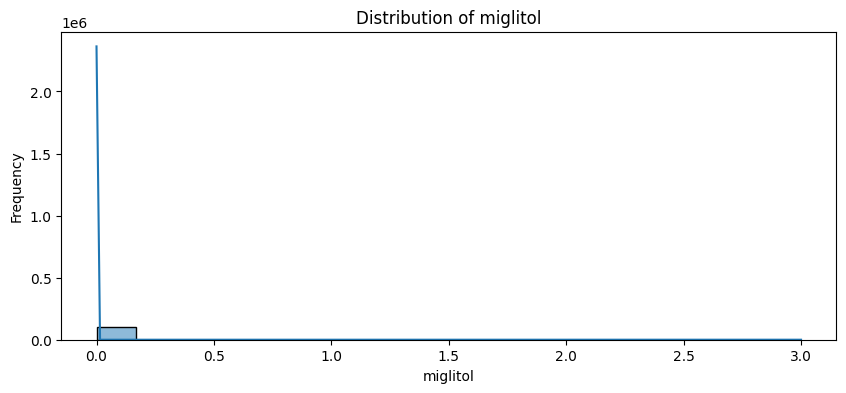

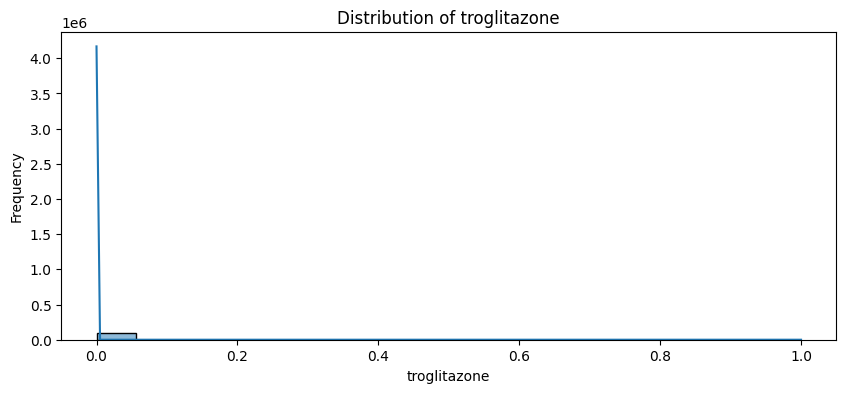

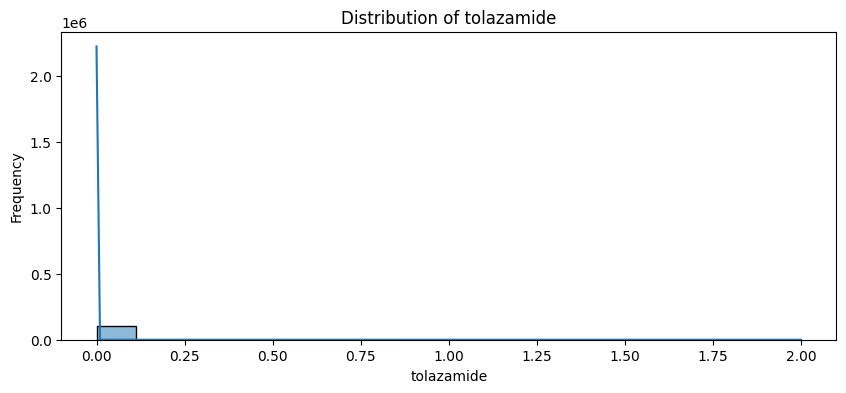

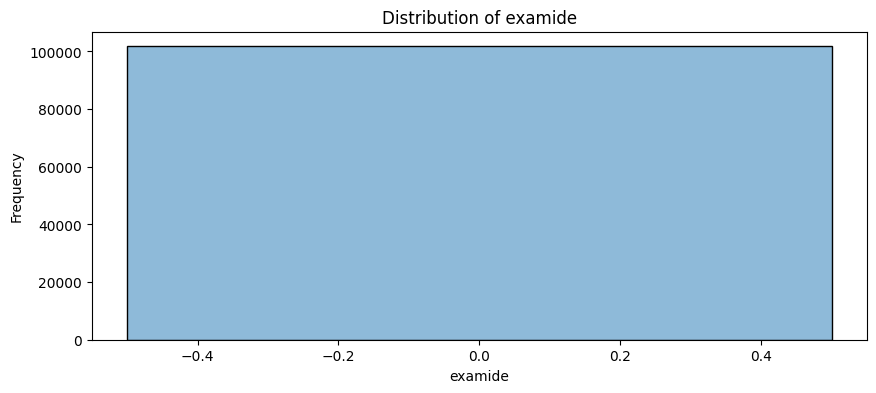

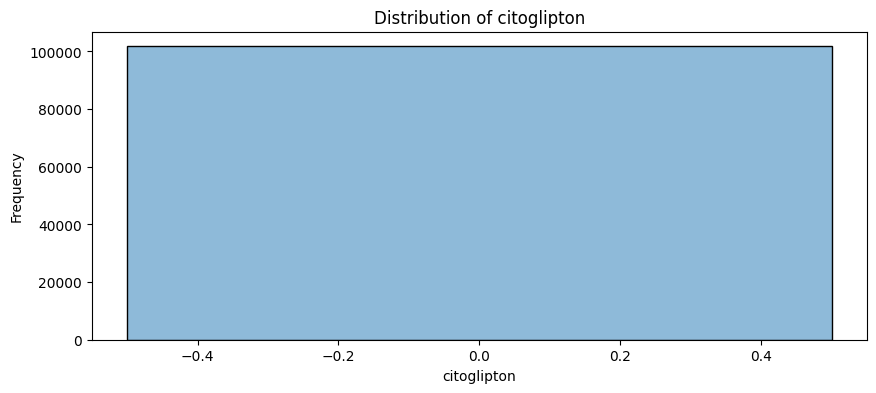

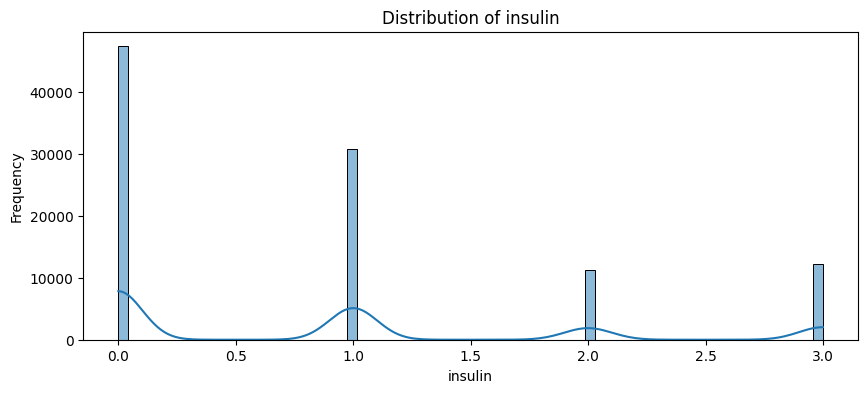

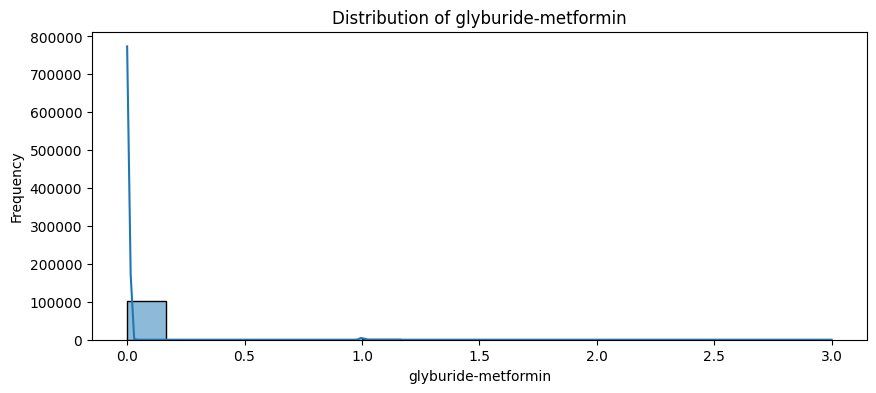

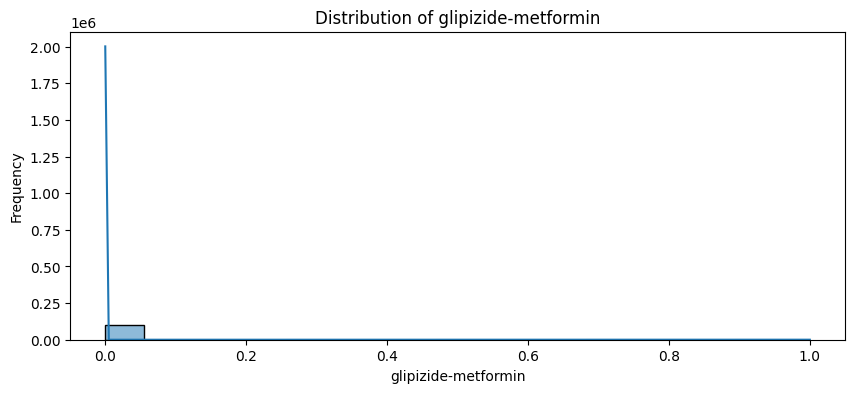

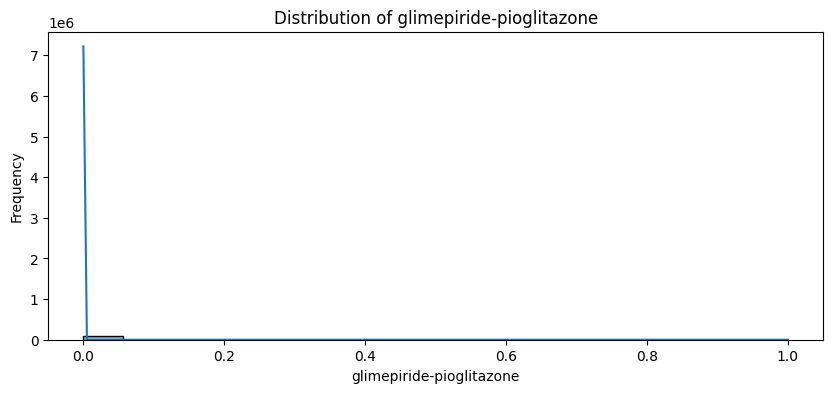

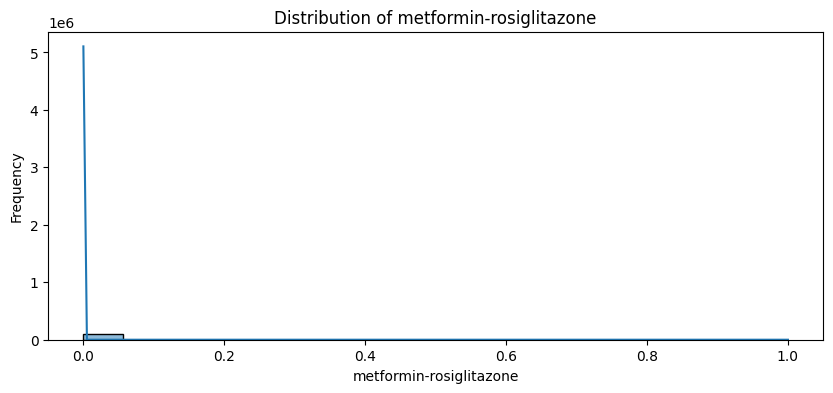

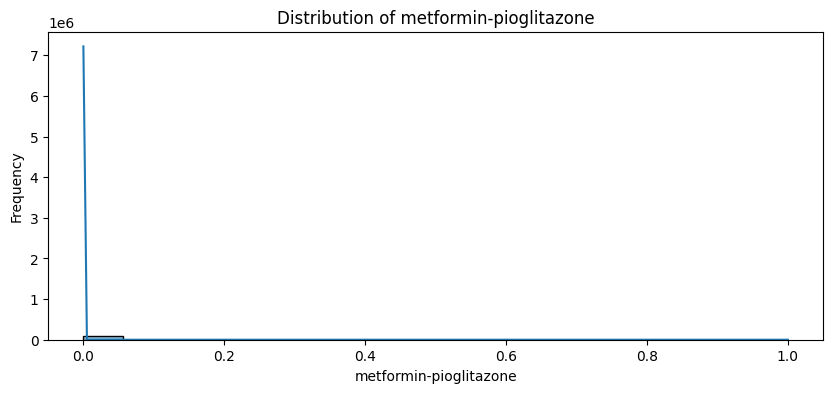

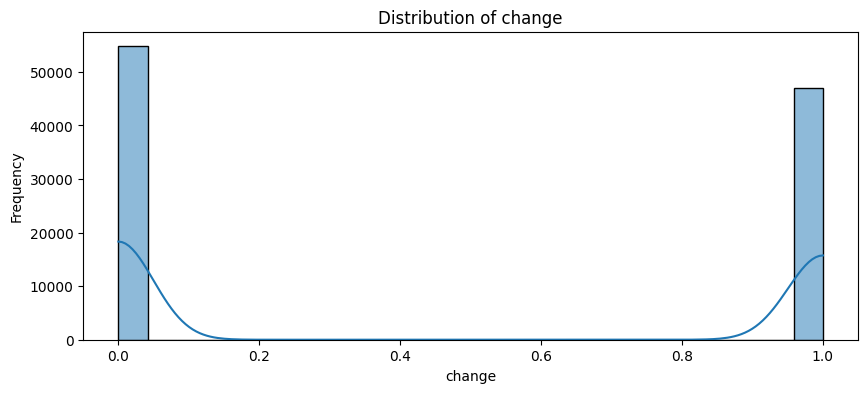

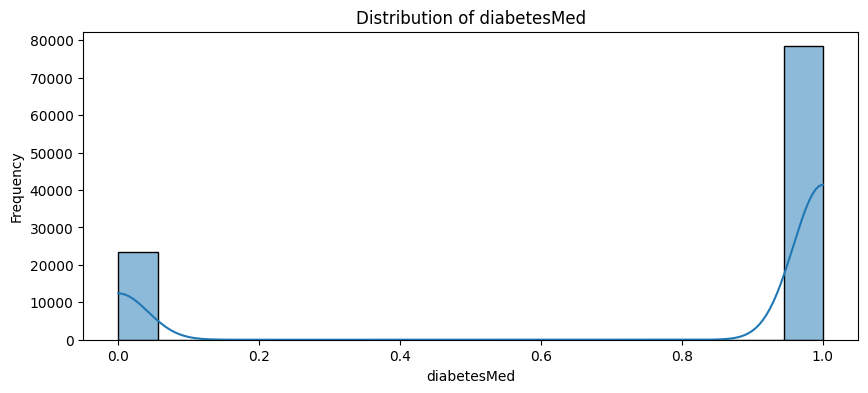

In [ ]:
admission_type_mapping = {1:'Emergency', 2: 'Urgent', 3:'Elective', 4:'Newborn', 5:'Not Available', 6:'Null', 7:'Trauma Center', 8:'Not Mapped'}
discharge_mapping = {
    1: 'Discharged to home',
    2: 'Transferred to another short term hospital',
    3: 'Transferred to SNF',
    4: 'Transferred to ICF',
    5: 'Transferred to another inpatient care institution',
    6: 'Transferred to home with home health service',
    7: 'Left AMA',
    8: 'Transferred to home under care of Home IV provider',
    9: 'Admitted as an inpatient to this hospital',
    10: 'Neonate discharged to another hospital for neonatal aftercare',
    11: 'Expired',
    12: 'Still patient or expected to return for outpatient services',
    13: 'Hospice / home',
    14: 'Hospice / medical facility',
    15: 'Discharged/transferred within this institution to Medicare approved swing bed',
    16: 'Discharged/transferred/referred another institution for outpatient services',
    17: 'Discharged/transferred/referred to this institution for outpatient services',
    18: 'NULL',
    19: 'Expired at home. Medicaid only, hospice.',
    20: 'Expired in a medical facility. Medicaid only, hospice.',
    21: 'Expired, place unknown. Medicaid only, hospice.',
    22: 'Discharged/transferred to another rehab fac including rehab units of a hospital.',
    23: 'Discharged/transferred to a long term care hospital.',
    24: 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
    25: 'Not Mapped',
    26: 'Unknown/Invalid',
    27: 'Discharged/transferred to a federal health care facility.',
    28: 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
    29: 'Discharged/transferred to a Critical Access Hospital (CAH).',
    30: 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere'
}
admission_source_mapping = {
    1: 'Physician Referral',
    2: 'Clinic Referral',
    3: 'HMO Referral',
    4: 'Transfer from a hospital',
    5: 'Transfer from a SNF',
    6: 'Transfer from another health care facility',
    7: 'Emergency Room',
    8: 'Court/Law Enforcement',
    9: 'Not Available',
    10: 'Transfer from critical access hospital',
    11: 'Normal Delivery',
    12: 'Premature Delivery',
    13: 'Sick Baby',
    14: 'Extramural Birth',
    15: 'Not Available',
    17: 'NULL',
    18: 'Transfer From Another Home Health Agency',
    19: 'Readmission to Same Home Health Agency',
    20: 'Not Mapped',
    21: 'Unknown/Invalid',
    22: 'Transfer from hospital inpt/same fac reslt in a sep claim',
    23: 'Born inside this hospital',
    24: 'Born outside this hospital',
    25: 'Transfer from Ambulatory Surgery Center',
    26: 'Transfer from Hospice'
}

for column in pandas_df.select_dtypes(include=['float64', 'int64']).columns:
  plt.figure(figsize=(10,4))
  sns.histplot(pandas_df[column], kde= True)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')

  if column == 'admission_type_id':
    plt.xticks(ticks=list(admission_type_mapping.keys()),labels= list(admission_type_mapping.values()), rotation=45)
  if column == 'discharge_disposition_id':
    plt.xticks(ticks=np.arange(1, len(discharge_mapping) + 1), labels=discharge_mapping.values(), rotation=90)
  if column == 'admission_source_id':
    plt.xticks(ticks=range(1, max(admission_source_mapping.keys()) + 1), labels=[admission_source_mapping.get(x, 'Unknown') for x in range(1, max(admission_source_mapping.keys()) + 1)],rotation=90)
  plt.show()

Lets extract some statistical data:

In [ ]:
# For admission type
admission_type_stats = pandas_df['admission_type_id'].value_counts(normalize=True) * 100
print("Admission Type Percentage of Distribution:\n", admission_type_stats)

# For discharge disposition
discharge_stats = pandas_df['discharge_disposition_id'].value_counts(normalize=True) * 100
print("\nDischarge Disposition Percentage of Distribution:\n", discharge_stats)

# For admission source
admission_source_stats = pandas_df['admission_source_id'].value_counts(normalize=True) * 100
print("\nAdmission Source Percentage of Distribution:\n", admission_source_stats)

numerical_stats = pandas_df.describe()
print("\nNumerical Statistics:\n", numerical_stats)

Admission Type Percentage of Distribution:
 1    53.053083
3    18.541556
2    18.159307
6     5.199182
5     4.701963
8     0.314447
7     0.020636
4     0.009826
Name: admission_type_id, dtype: float64

Discharge Disposition Percentage of Distribution:
 1     59.188727
3     13.711849
6     12.678105
18     3.626948
2      2.091072
22     1.958414
11     1.613505
5      1.163453
25     0.971837
4      0.800857
7      0.612189
23     0.404850
13     0.392076
14     0.365544
28     0.136588
8      0.106126
15     0.061907
24     0.047167
9      0.020636
17     0.013757
16     0.010809
19     0.007861
10     0.005896
27     0.004913
12     0.002948
20     0.001965
Name: discharge_disposition_id, dtype: float64

Admission Source Percentage of Distribution:
 7     56.496276
1     29.051943
17     6.663326
4      3.131694
6      2.224712
2      1.084842
5      0.840163
3      0.183755
20     0.158206
9      0.122831
8      0.015722
22     0.011792
10     0.007861
14     0.001965
11     0.0

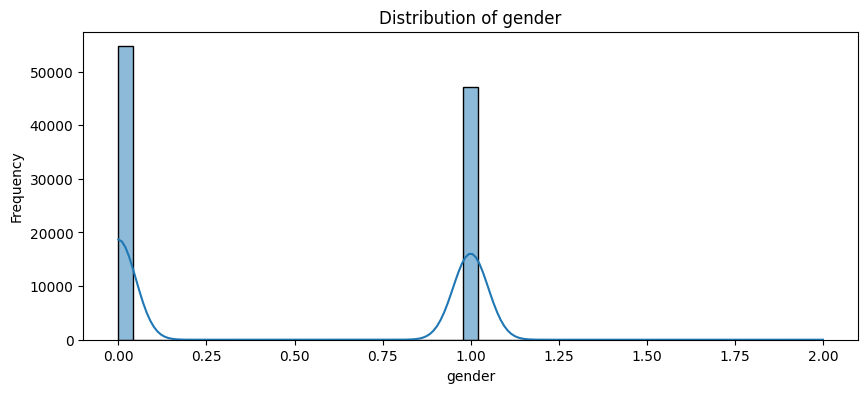

Statistical Summary for gender:
count    101766.000000
mean          0.462443
std           0.498649
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.000000
Name: gender, dtype: float64



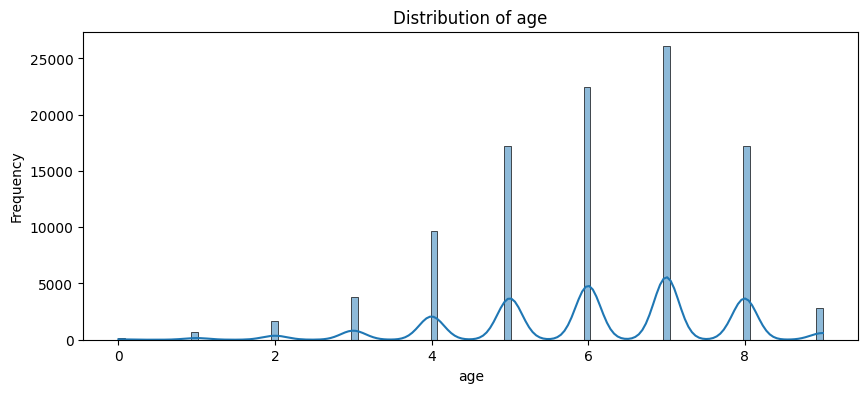

Statistical Summary for age:
count    101766.000000
mean          6.096702
std           1.594084
min           0.000000
25%           5.000000
50%           6.000000
75%           7.000000
max           9.000000
Name: age, dtype: float64



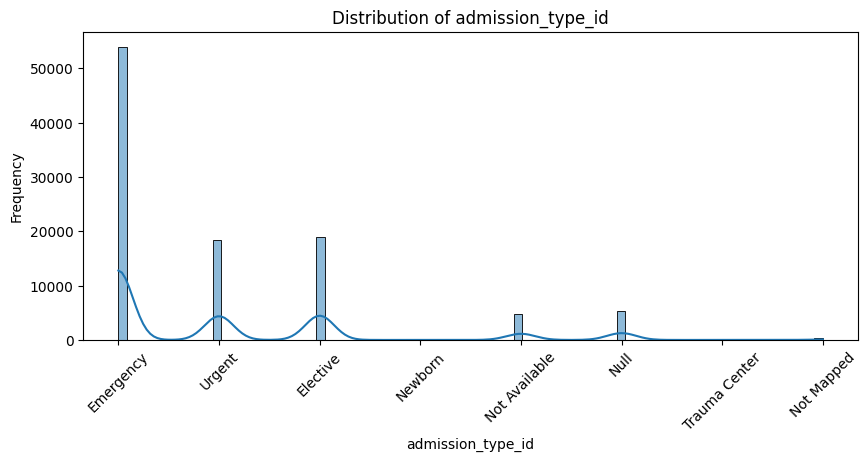

Statistical Summary for admission_type_id:
count    101766.000000
mean          2.024006
std           1.445403
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max           8.000000
Name: admission_type_id, dtype: float64



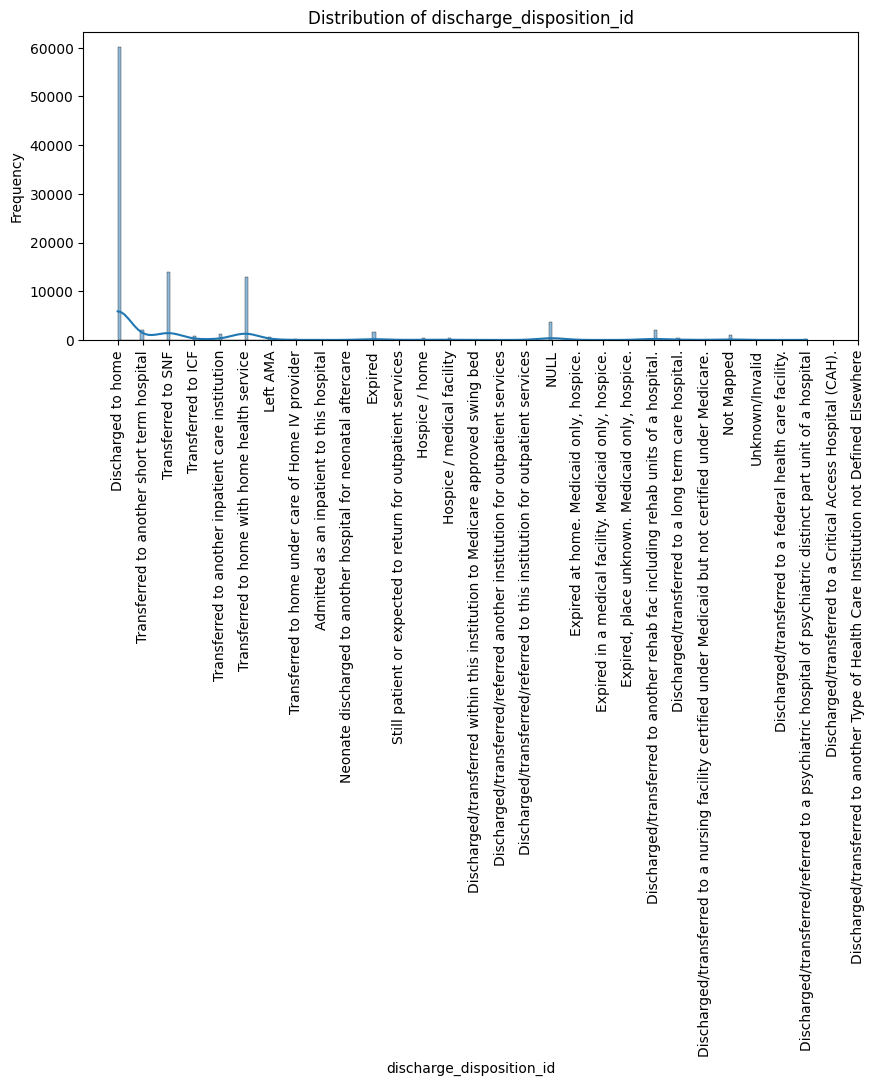

Statistical Summary for discharge_disposition_id:
count    101766.000000
mean          3.715642
std           5.280166
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          28.000000
Name: discharge_disposition_id, dtype: float64



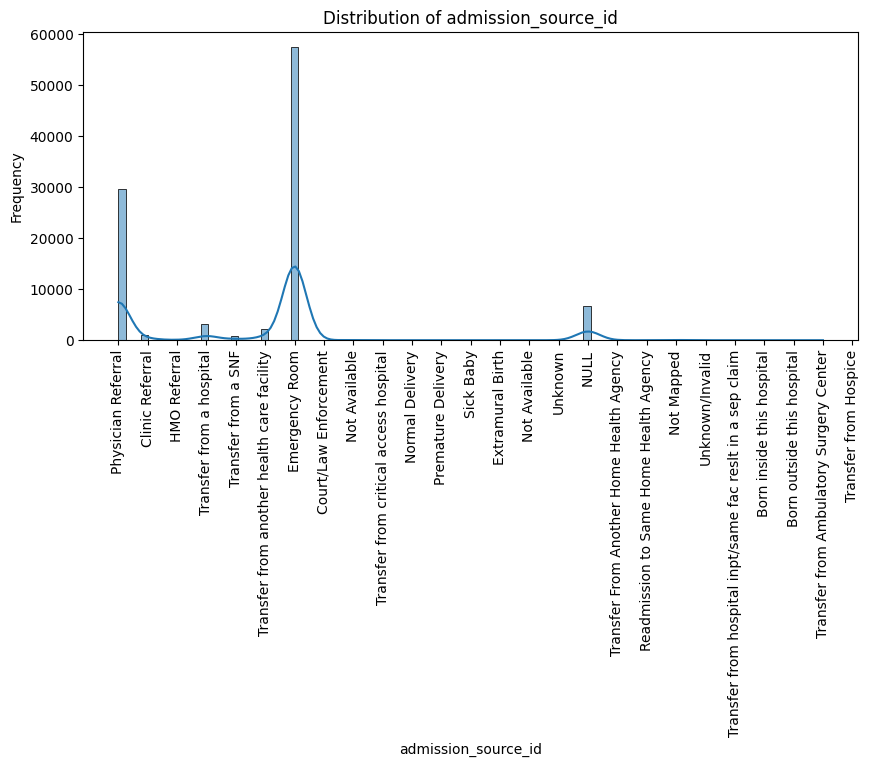

Statistical Summary for admission_source_id:
count    101766.000000
mean          5.754437
std           4.064081
min           1.000000
25%           1.000000
50%           7.000000
75%           7.000000
max          25.000000
Name: admission_source_id, dtype: float64



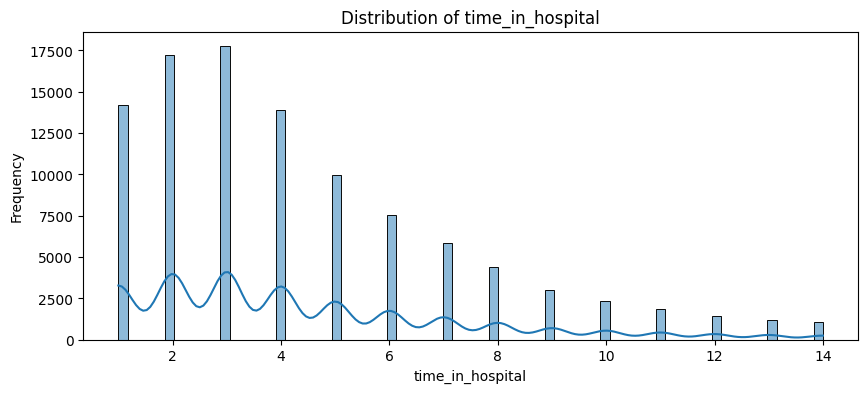

Statistical Summary for time_in_hospital:
count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64



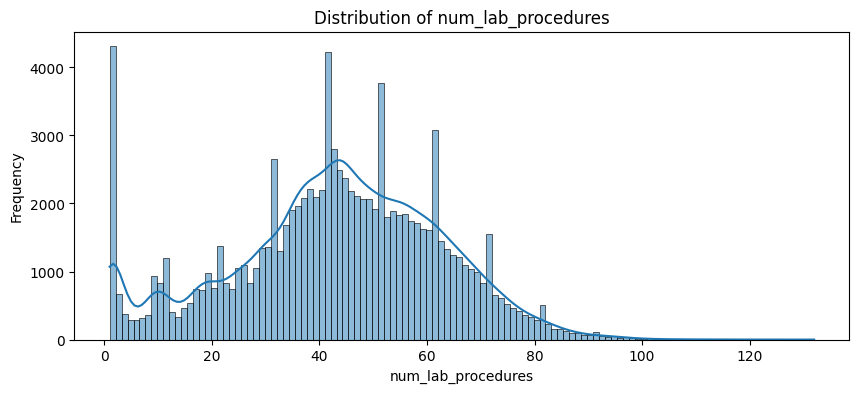

Statistical Summary for num_lab_procedures:
count    101766.000000
mean         43.095641
std          19.674362
min           1.000000
25%          31.000000
50%          44.000000
75%          57.000000
max         132.000000
Name: num_lab_procedures, dtype: float64



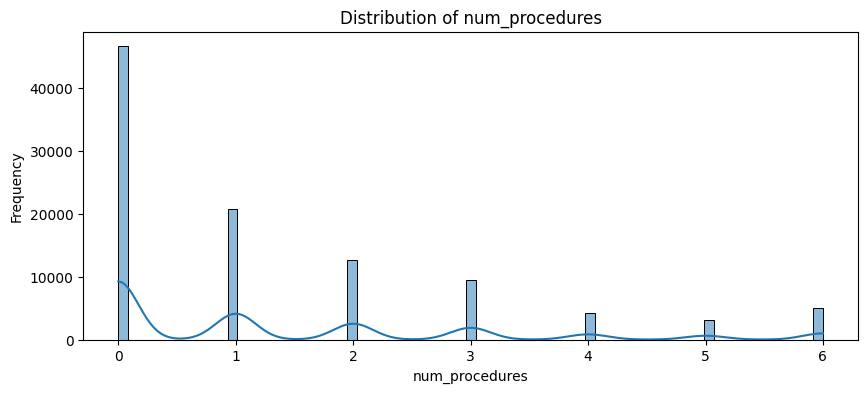

Statistical Summary for num_procedures:
count    101766.000000
mean          1.339730
std           1.705807
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: num_procedures, dtype: float64



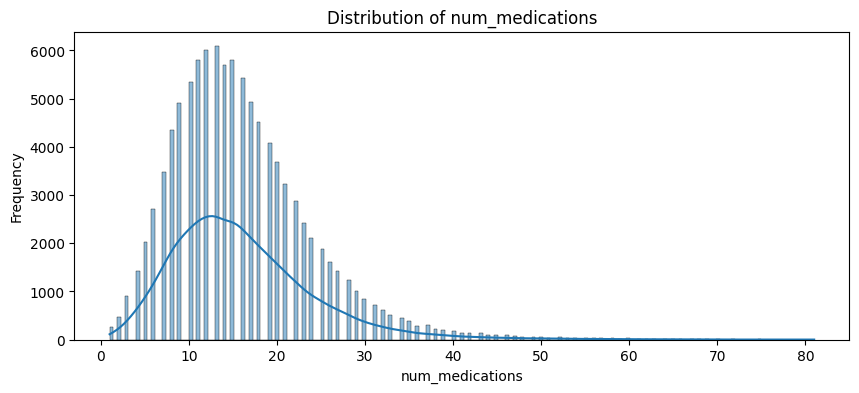

Statistical Summary for num_medications:
count    101766.000000
mean         16.021844
std           8.127566
min           1.000000
25%          10.000000
50%          15.000000
75%          20.000000
max          81.000000
Name: num_medications, dtype: float64



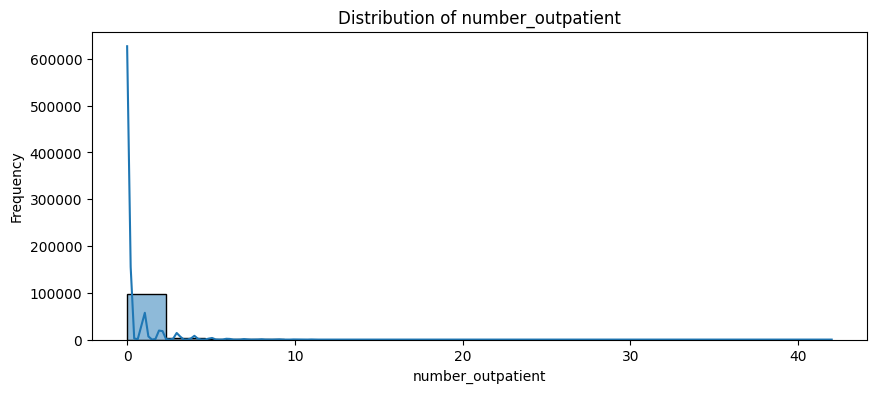

Statistical Summary for number_outpatient:
count    101766.000000
mean          0.369357
std           1.267265
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          42.000000
Name: number_outpatient, dtype: float64



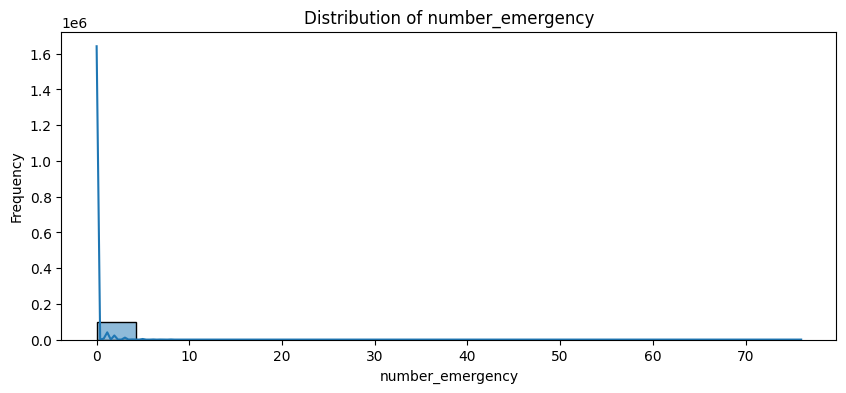

Statistical Summary for number_emergency:
count    101766.000000
mean          0.197836
std           0.930472
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          76.000000
Name: number_emergency, dtype: float64



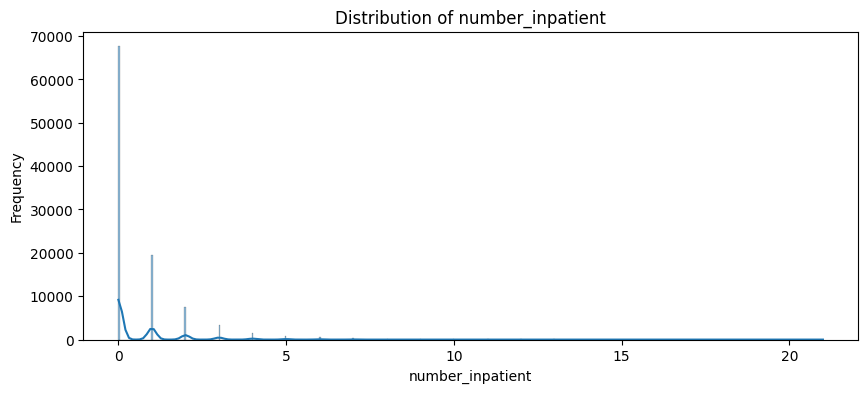

Statistical Summary for number_inpatient:
count    101766.000000
mean          0.635566
std           1.262863
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          21.000000
Name: number_inpatient, dtype: float64



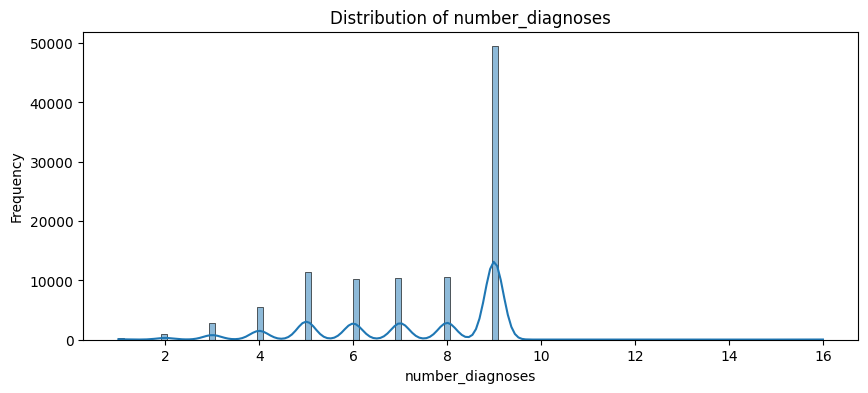

Statistical Summary for number_diagnoses:
count    101766.000000
mean          7.422607
std           1.933600
min           1.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          16.000000
Name: number_diagnoses, dtype: float64



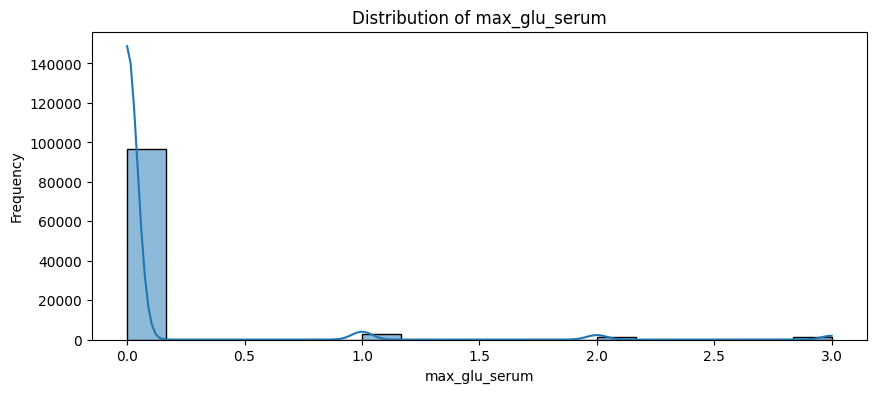

Statistical Summary for max_glu_serum:
count    101766.000000
mean          0.091966
std           0.432688
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: max_glu_serum, dtype: float64



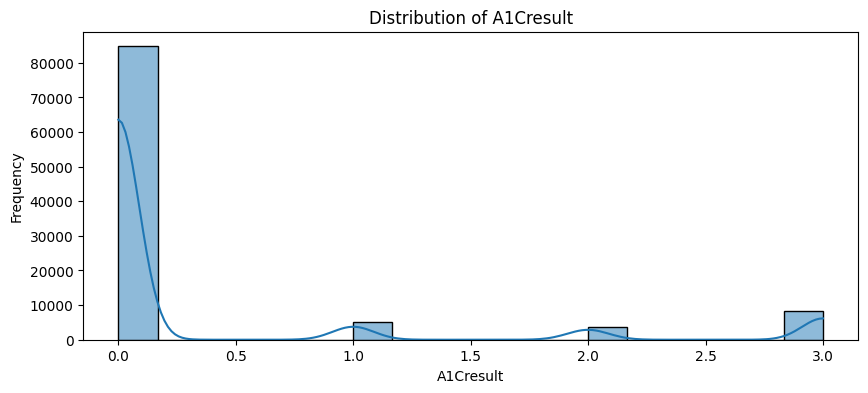

Statistical Summary for A1Cresult:
count    101766.000000
mean          0.366154
std           0.889615
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: A1Cresult, dtype: float64



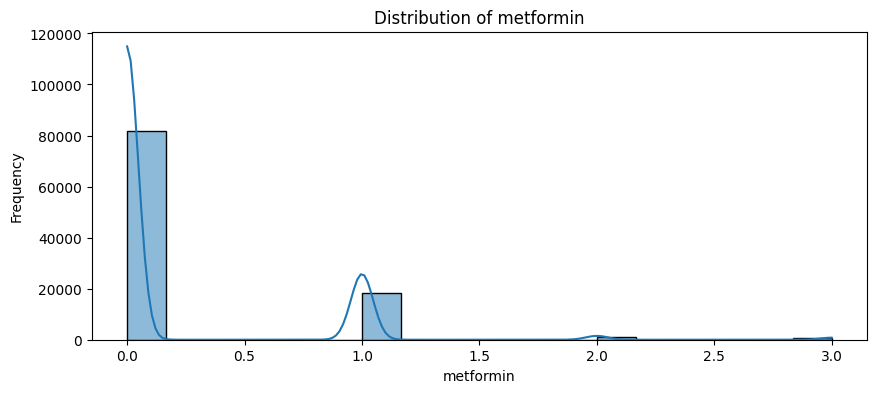

Statistical Summary for metformin:
count    101766.000000
mean          0.218197
std           0.474826
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: metformin, dtype: float64



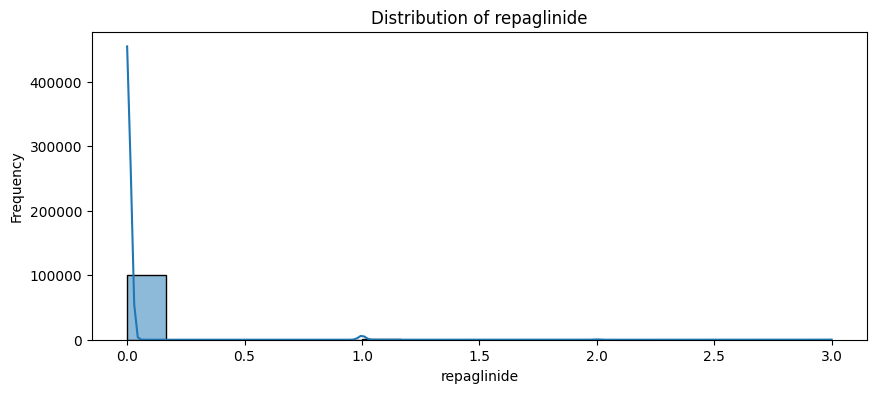

Statistical Summary for repaglinide:
count    101766.000000
mean          0.017088
std           0.147008
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: repaglinide, dtype: float64



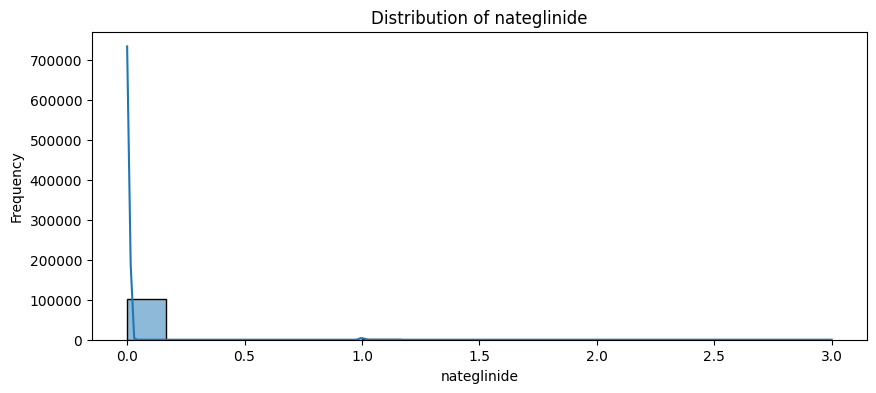

Statistical Summary for nateglinide:
count    101766.000000
mean          0.007360
std           0.091794
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: nateglinide, dtype: float64



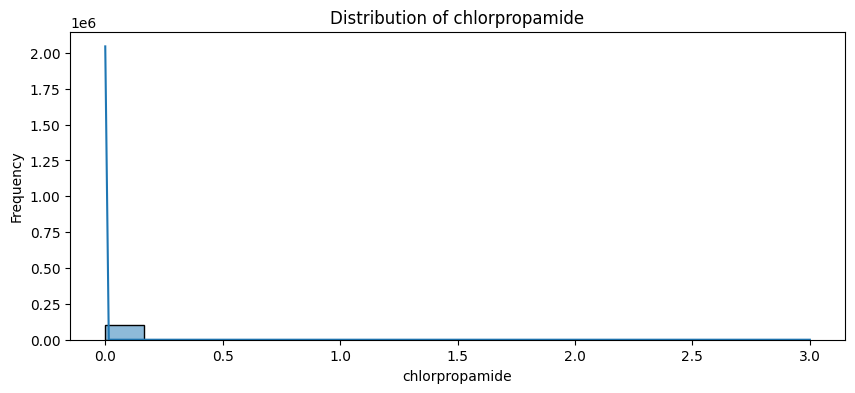

Statistical Summary for chlorpropamide:
count    101766.000000
mean          0.000924
std           0.033162
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: chlorpropamide, dtype: float64



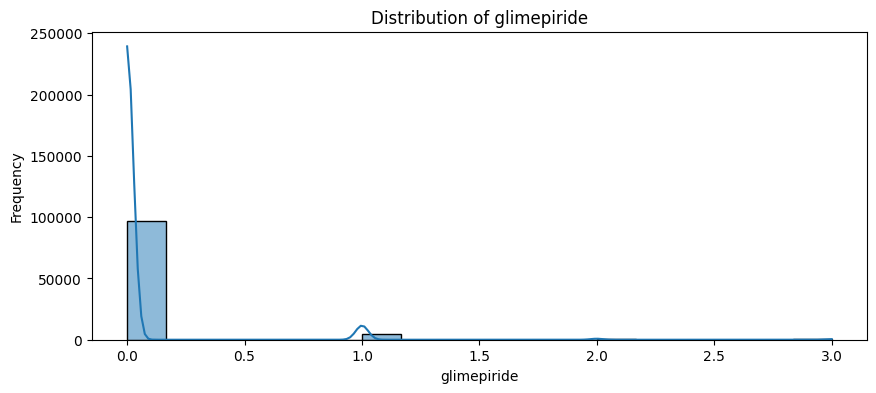

Statistical Summary for glimepiride:
count    101766.000000
mean          0.058035
std           0.269318
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: glimepiride, dtype: float64



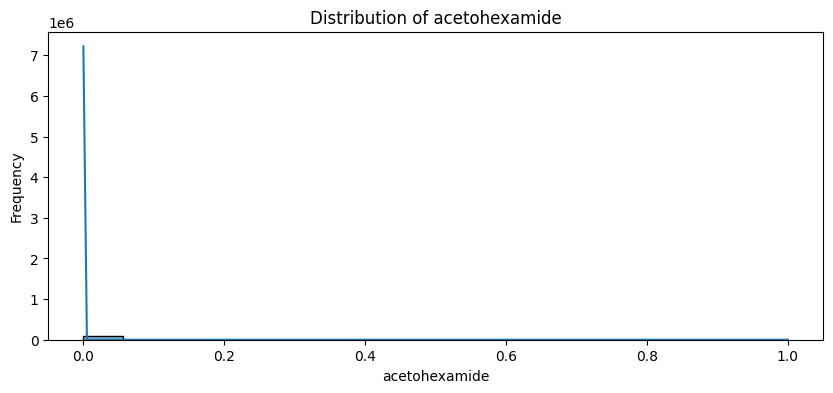

Statistical Summary for acetohexamide:
count    101766.000000
mean          0.000010
std           0.003135
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: acetohexamide, dtype: float64



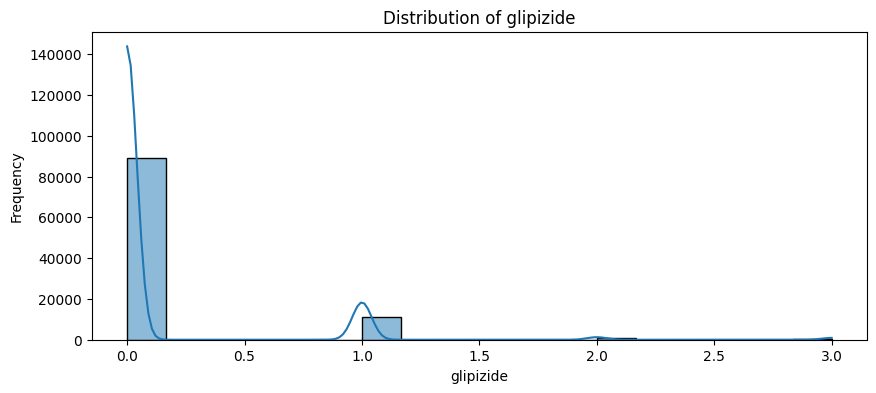

Statistical Summary for glipizide:
count    101766.000000
mean          0.143231
std           0.413361
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: glipizide, dtype: float64



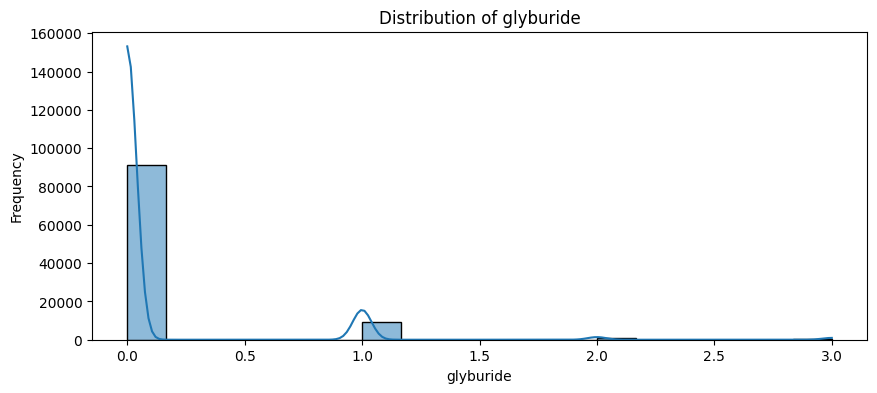

Statistical Summary for glyburide:
count    101766.000000
mean          0.123715
std           0.397017
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: glyburide, dtype: float64



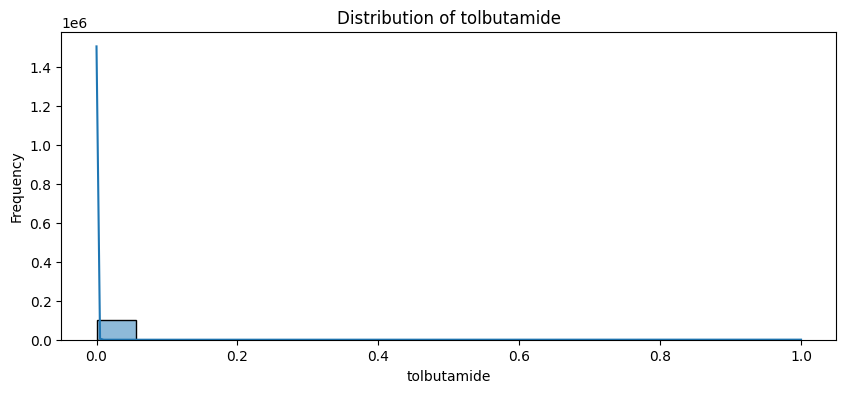

Statistical Summary for tolbutamide:
count    101766.000000
mean          0.000226
std           0.015032
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: tolbutamide, dtype: float64



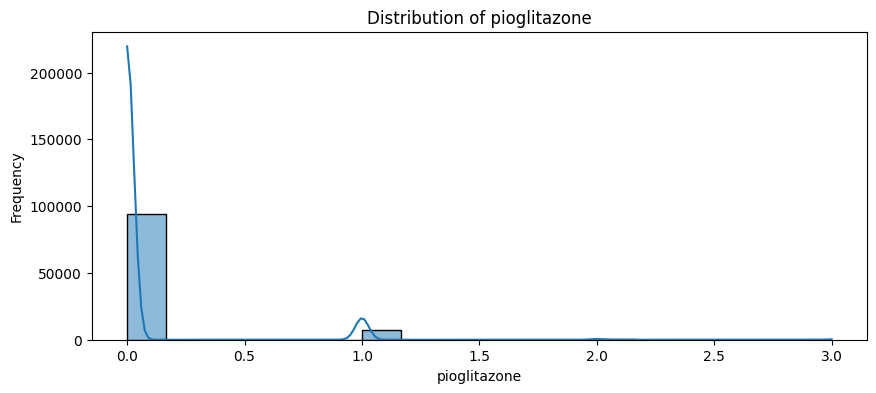

Statistical Summary for pioglitazone:
count    101766.000000
mean          0.076627
std           0.286900
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: pioglitazone, dtype: float64



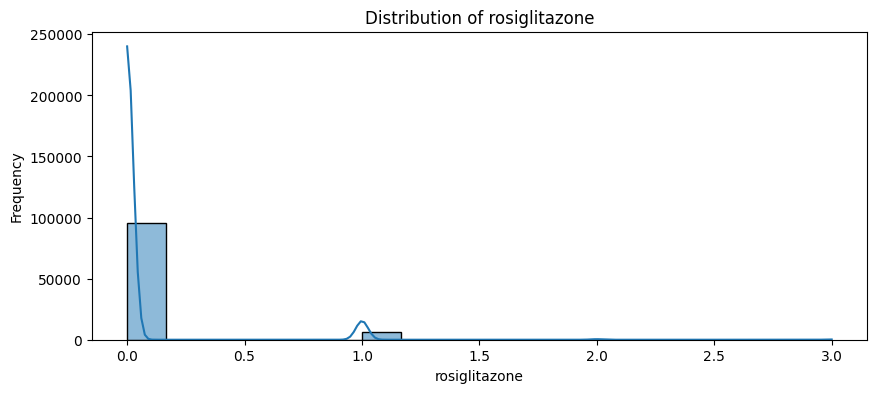

Statistical Summary for rosiglitazone:
count    101766.000000
mean          0.066004
std           0.265096
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: rosiglitazone, dtype: float64



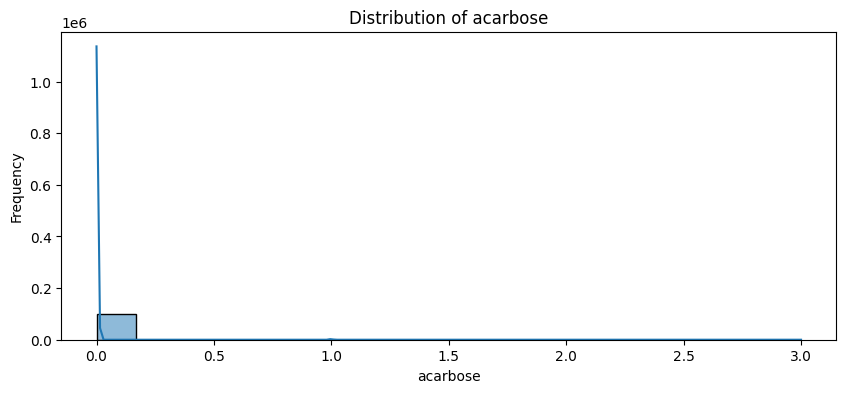

Statistical Summary for acarbose:
count    101766.000000
mean          0.003184
std           0.059557
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: acarbose, dtype: float64



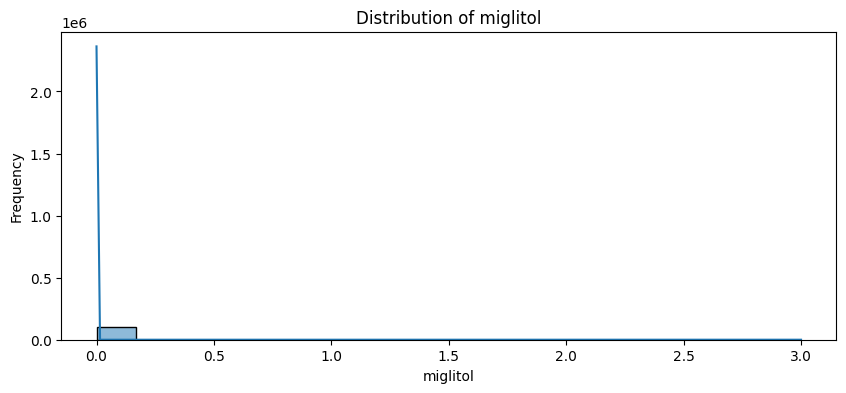

Statistical Summary for miglitol:
count    101766.000000
mean          0.000491
std           0.028726
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: miglitol, dtype: float64



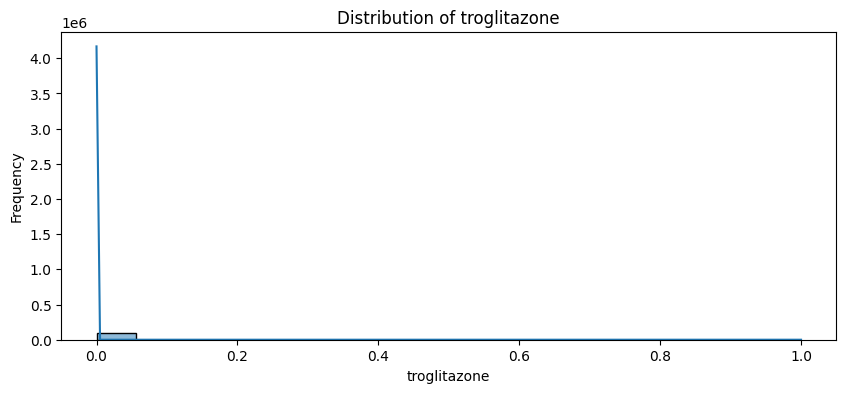

Statistical Summary for troglitazone:
count    101766.000000
mean          0.000029
std           0.005429
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: troglitazone, dtype: float64



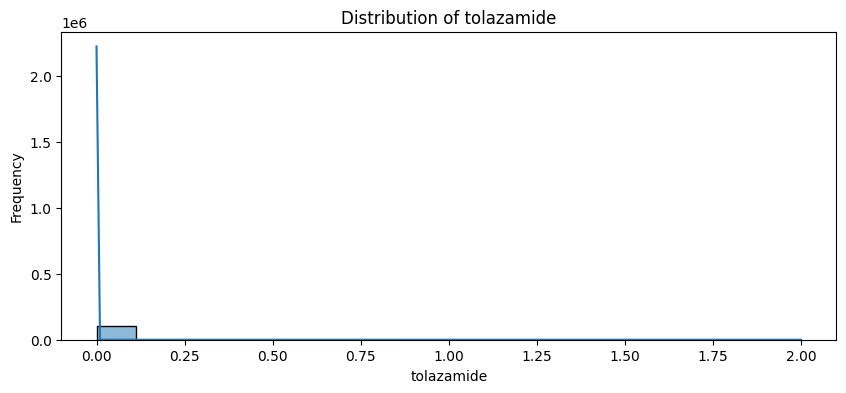

Statistical Summary for tolazamide:
count    101766.000000
mean          0.000393
std           0.020312
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: tolazamide, dtype: float64



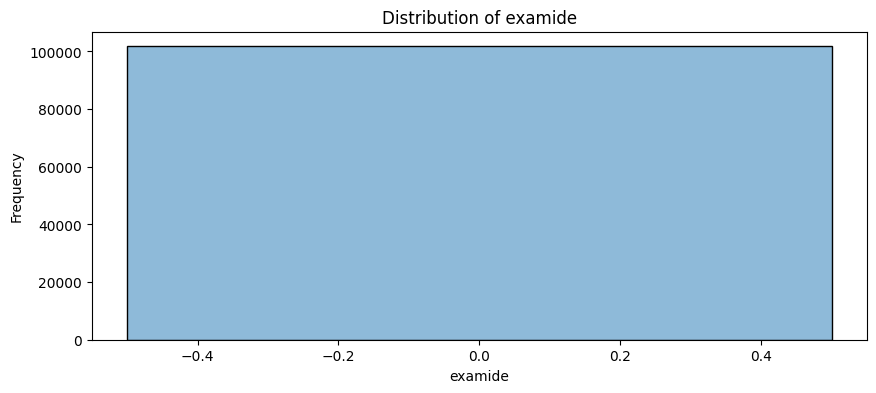

Statistical Summary for examide:
count    101766.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: examide, dtype: float64



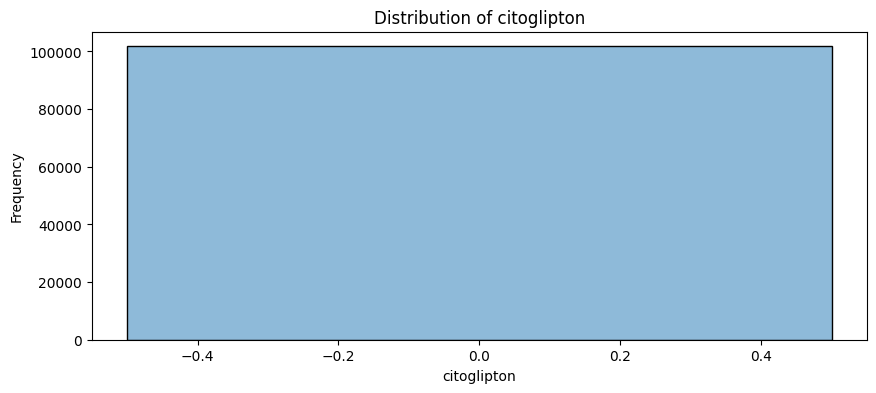

Statistical Summary for citoglipton:
count    101766.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: citoglipton, dtype: float64



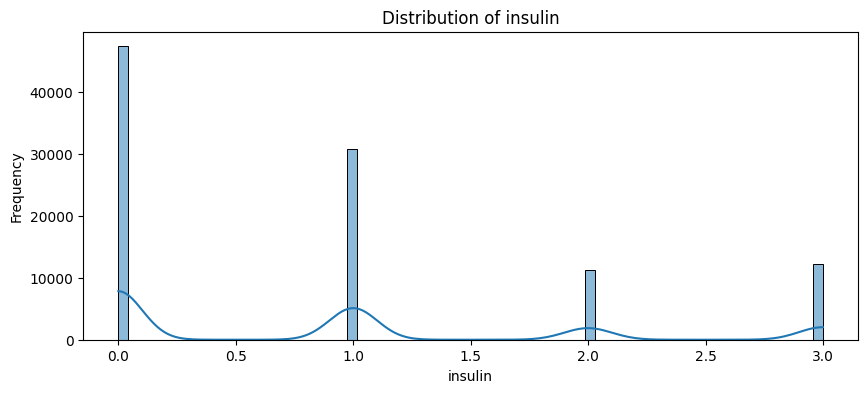

Statistical Summary for insulin:
count    101766.000000
mean          0.885708
std           1.021758
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: insulin, dtype: float64



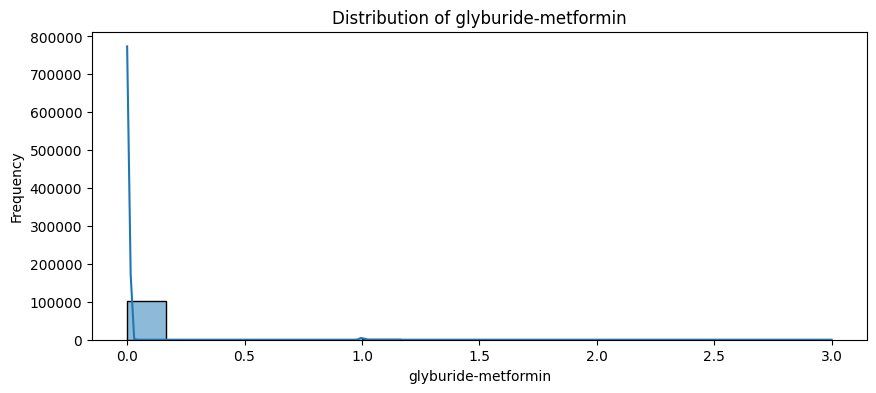

Statistical Summary for glyburide-metformin:
count    101766.000000
mean          0.007134
std           0.087145
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: glyburide-metformin, dtype: float64



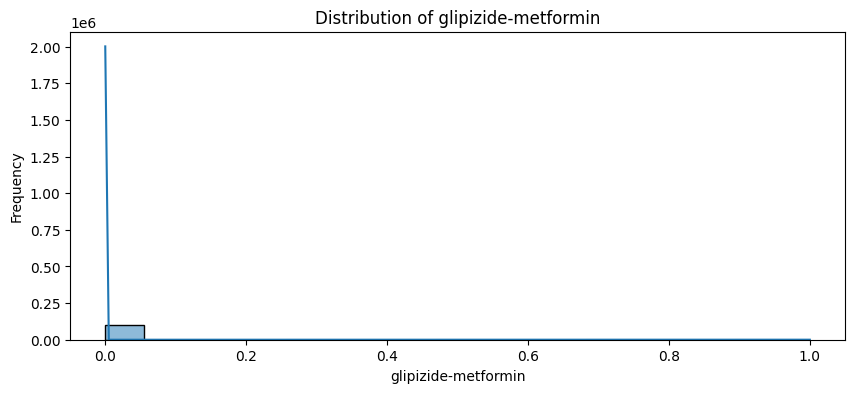

Statistical Summary for glipizide-metformin:
count    101766.000000
mean          0.000128
std           0.011302
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: glipizide-metformin, dtype: float64



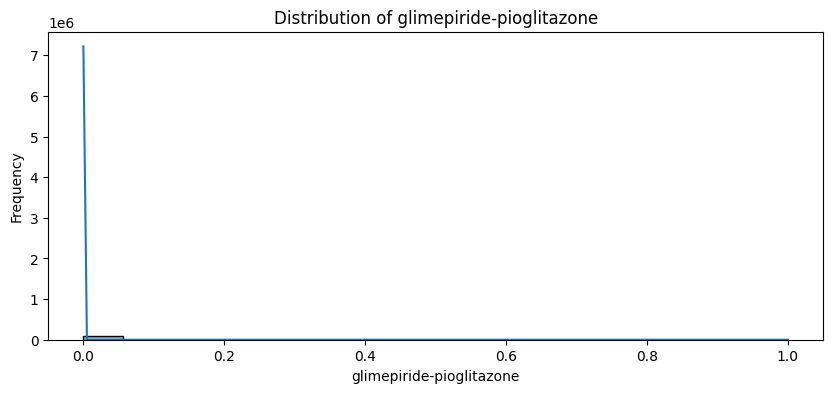

Statistical Summary for glimepiride-pioglitazone:
count    101766.000000
mean          0.000010
std           0.003135
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: glimepiride-pioglitazone, dtype: float64



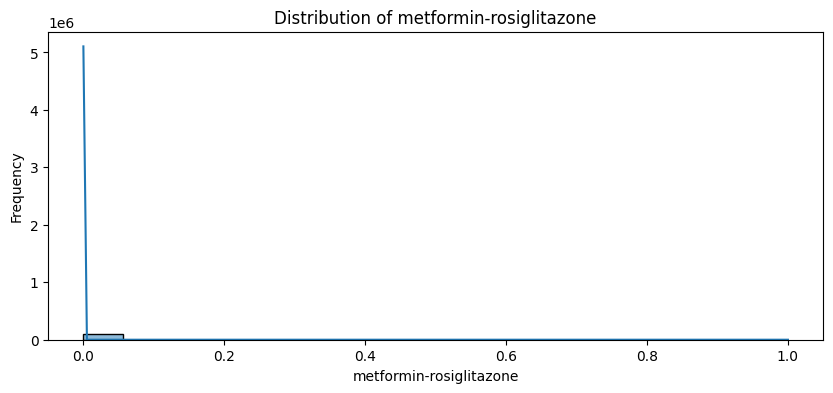

Statistical Summary for metformin-rosiglitazone:
count    101766.000000
mean          0.000020
std           0.004433
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: metformin-rosiglitazone, dtype: float64



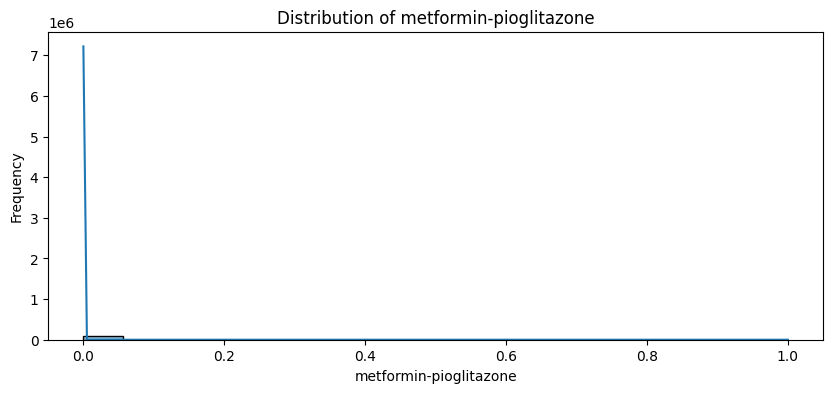

Statistical Summary for metformin-pioglitazone:
count    101766.000000
mean          0.000010
std           0.003135
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: metformin-pioglitazone, dtype: float64



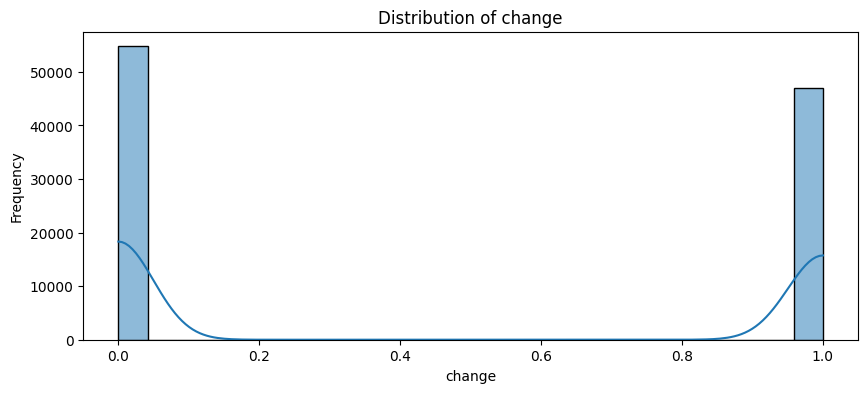

Statistical Summary for change:
count    101766.000000
mean          0.461952
std           0.498553
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: change, dtype: float64



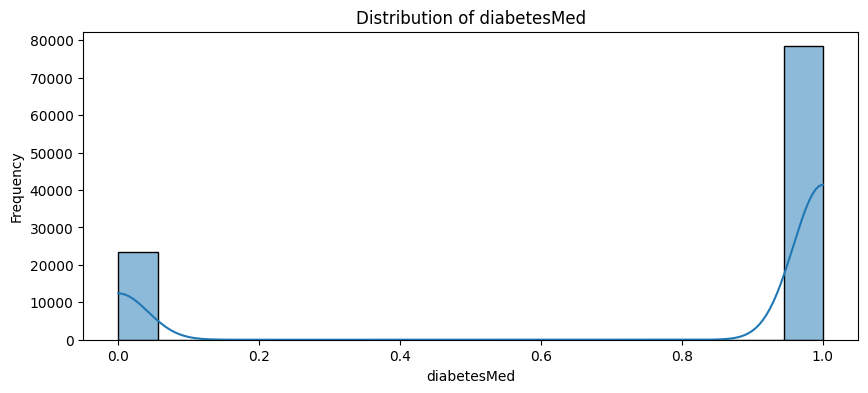

Statistical Summary for diabetesMed:
count    101766.000000
mean          0.770031
std           0.420815
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: diabetesMed, dtype: float64



In [ ]:
for column in pandas_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10,4))
    sns.histplot(pandas_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Check and apply the x-axis label mappings if the column has a corresponding mapping
    if column == 'admission_type_id':
        plt.xticks(ticks=list(admission_type_mapping.keys()), labels=list(admission_type_mapping.values()), rotation=45)
    elif column == 'discharge_disposition_id':
        plt.xticks(ticks=np.arange(1, len(discharge_mapping) + 1), labels=discharge_mapping.values(), rotation=90)
    elif column == 'admission_source_id':
        plt.xticks(ticks=range(1, max(admission_source_mapping.keys()) + 1), labels=[admission_source_mapping.get(x, 'Unknown') for x in range(1, max(admission_source_mapping.keys()) + 1)], rotation=90)

    plt.show()

    # Print the statistical summary for the column
    if column in admission_type_mapping or column in discharge_mapping or column in admission_source_mapping:
        # For categorical columns with mappings
        counts = pandas_df[column].value_counts()
        percentages = pandas_df[column].value_counts(normalize=True) * 100
        print(f"Counts for {column}:\n{counts}\n")
        print(f"Percentages for {column}:\n{percentages}\n")
    else:
        # For purely numeric columns
        stats = pandas_df[column].describe()
        print(f"Statistical Summary for {column}:\n{stats}\n")

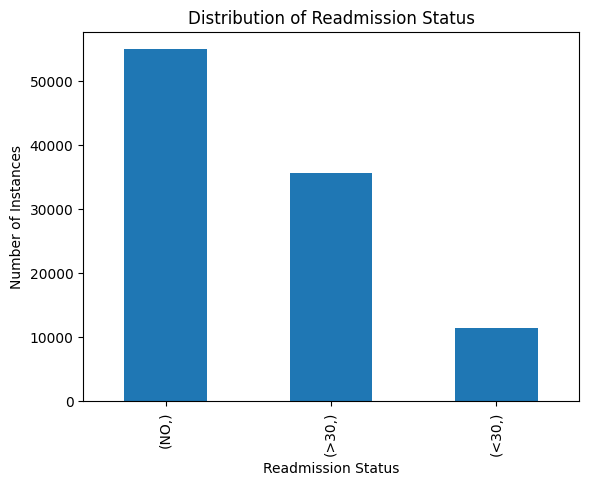

Class Ratios:
 readmitted
NO            0.539119
>30           0.349282
<30           0.111599
dtype: float64


In [ ]:
class_counts = y_130.value_counts()

class_counts.plot(kind='bar')
plt.xlabel('Readmission Status')
plt.ylabel('Number of Instances')
plt.title('Distribution of Readmission Status')
plt.show()

class_ratios = class_counts / len(y_130)
print("Class Ratios:\n", class_ratios)